<a href="https://colab.research.google.com/github/namtoptall/DataScience/blob/main/Milestone_project_SkimLit_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. Milestone Project 2: SkimLit üìÑüî•

·ªû notebook tr∆∞·ªõc ([Gi·ªõi thi·ªáu v·ªÅ NLP trong TensorFlow](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), ch√∫ng ta ƒë√£ t√¨m hi·ªÉu m·ªôt s·ªë kh√°i ni·ªám NLP c∆° b·∫£n, trong ƒë√≥ c√≥ hai kh√°i ni·ªám ch√≠nh l√† **tokenzation** (bi·∫øn t·ª´ th√†nh s·ªë) v√† **t·∫°o embedding** (t·∫°o bi·ªÉu di·ªÖn d·∫°ng s·ªë c·ªßa t·ª´).

Trong project n√†y, ch√∫ng ta s·∫Ω th·ª±c h√†nh ki·∫øn th·ª©c v·ªÅ NLP ƒë√£ h·ªçc.

C·ª• th·ªÉ, ch√∫ng ta s·∫Ω t√°i t·∫°o l·∫°i m√¥ h√¨nh h·ªçc s√¢u trong t√†i li·ªáu [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071) (2017).

L√∫c ph√°t h√†nh, t√†i li·ªáu n√†y ƒë√£ bi·ªÉu di·ªÖn m·ªôt t·∫≠p d·ªØ li·ªáu m·ªõi l√† PubMed 200k RCT, ch·ª©a ~200,000 Randomized Controlled Trial (RCT) abstract ƒë∆∞·ª£c g·∫Øn nh√£n.

M·ª•c ƒë√≠ch c·ªßa t·∫≠p d·ªØ li·ªáu n√†y l√† kh√°m ph√° kh·∫£ nƒÉng ph√¢n lo·∫°i c√¢u xu·∫•t hi·ªán theo tr√¨nh t·ª± c·ªßa c√°c m√¥ h√¨nh NLP.

N√≥i c√°ch kh√°c, v·ªõi c√°c RCT abstract ƒë√£ cho, m·ªói c√¢u c√≥ v√†i tr√≤ g√¨ trong abstract?

![Skimlit example inputs and outputs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-skimlit-overview-input-and-output.png)

*V√≠ d·ª• v·ªÅ ƒë·∫ßu v√†o ([ph·∫ßn abstract kh√≥ ƒë·ªçc h∆°n t·ª´ PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) v√† ƒë·∫ßu ra ([ph·∫ßn abstract d·ªÖ ƒë·ªçc h∆°n](https://pubmed.ncbi.nlm.nih.gov/32537182/)) c·ªßa m√¥ h√¨nh m√† ch√∫ng ta ƒëang x√¢y d·ª±ng. M√¥ h√¨nh s·∫Ω l·∫•y m·ªôt kh·ªëi vƒÉn b·∫£n v√† d·ª± ƒëo√°n nh√£n c·ªßa ph·∫ßn m√† t·ª´ng c√¢u c√≥.*  

### ƒê·∫ßu v√†o m√¥ h√¨nh

V√≠ d·ª•, ch√∫ng ta c√≥ th·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh NLP c√≥ c√°c ƒë·∫ßu v√†o sau (l∆∞u √Ω: m·∫´u sau c√≥ c√°c k√Ω t·ª± s·ªë ƒë∆∞·ª£c thay b·∫±ng "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### ƒê·∫ßu ra m√¥ h√¨nh

M√¥ h√¨nh tr·∫£ v·ªÅ ƒë·∫ßu ra sau:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### V·∫•n ƒë·ªÅ trong c√¢u

S·ªë l∆∞·ª£ng t√†i li·ªáu RCT ph√°t h√†nh ng√†y c√†ng tƒÉng, nh·ªØng t√†i li·ªáu kh√¥ng c√≥ abstract c√≥ c·∫•u tr√∫c s·∫Ω kh√≥ ƒë·ªçc v√† khi·∫øn qu√° tr√¨nh t√¨m hi·ªÉu c·ªßa c√°c nh√† nghi√™n c·ª©u ch·∫≠m l·∫°i.

### Gi·∫£i ph√°p trong c√¢u

T·∫°o m√¥ h√¨nh NLP ƒë·ªÉ ph√¢n lo·∫°i c√°c c√¢u abstract th√†nh vai tr√≤ c·ªßa ch√∫ng (ch·∫≥ng h·∫°n: m·ª•c ti√™u, ph∆∞∆°ng th·ª©c, k·∫øt qu·∫£,...) cho ph√©p c√°c nh√† nghi√™n c·ª©u ƒë·ªçc qua t√†i li·ªáu (SkimLit ü§ìüî•) v√† t√¨m hi·ªÉu s√¢u h∆°n n·∫øu c·∫ßn

> üìñ **T√†i li·ªáu:** Tr∆∞·ªõc khi xem qua code trong notebook n√†y, ch√∫ng ta c·∫ßn bi·∫øt nh·ªØng g√¨ ch√∫ng ta s·∫Ω l√†m. H√£y d√†nh m·ªôt (ho·∫∑c hai gi·ªù) xem qua c√°c t√†i li·ªáu sau r·ªìi quay l·∫°i notebook n√†y:
1. D·ªØ li·ªáu c·ªßa ch√∫ng ta c√≥ t·ª´ ƒë√¢u: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. M√¥ h√¨nh c·ªßa ch√∫ng ta c√≥ t·ª´ ƒë√¢u: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## Nh·ªØng ƒëi·ªÅu ch√∫ng ta s·∫Ω t√¨m hi·ªÉu

ƒê√£ ƒë·∫øn l√∫c v·∫≠n d·ª•ng nh·ªØng g√¨ ch√∫ng ta ƒë√£ h·ªçc ƒë∆∞·ª£c t·ª´ notebook v·ªÅ NLP v√† x√¢y d·ª±ng m√¥ h√¨nh NLP l·ªõn nh·∫•t c·ªßa ch√∫ng ta:

* Download t·∫≠p d·ªØ li·ªáu vƒÉn b·∫£n ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Vi·∫øt m·ªôt h√†m ti·ªÅn x·ª≠ l√Ω ƒë·ªÉ chu·∫©n b·ªã d·ªØ li·ªáu cho vi·ªác l·∫≠p m√¥ h√¨nh
* Thi·∫øt l·∫≠p m·ªôt lo·∫°t c√°c th·ª≠ nghi·ªám l·∫≠p m√¥ h√¨nh
  * L·∫≠p m√¥ h√¨nh c∆° s·ªü (b·ªô ph√¢n lo·∫°i TF-IDF)
  *  M√¥ h√¨nh s√¢u v·ªõi c√°c t·ªï h·ª£p kh√°c nhau c·ªßa: token embedding, character embedding, pretrained embedding, positional embedding
* X√¢y d·ª±ng m√¥ h√¨nh ƒëa ph∆∞∆°ng th·ª©c ƒë·∫ßu ti√™n (nhi·ªÅu lo·∫°i ƒë·∫ßu v√†o d·ªØ li·ªáu)
  * Sao ch√©p ki·∫øn ‚Äã‚Äãtr√∫c m√¥ h√¨nh t·ª´ https://arxiv.org/pdf/1612.05251.pdf
* T√¨m c√°c d·ª± ƒëo√°n sai nhi·ªÅu nh·∫•t
* ƒê∆∞a ra d·ª± ƒëo√°n tr√™n PubMed abstract t·ª´ t·ª± nhi√™n

## C√°ch s·ª≠ d·ª•ng notebook n√†y

C√°c b·∫°n c√≥ th·ªÉ ƒë·ªçc qua c√°c m√¥ t·∫£ v√† code (t·∫•t c·∫£ s·∫Ω ch·∫°y, tr·ª´ nh·ªØng cell m·∫Øc l·ªói c√≥ ch·ªß ƒë√≠ch), nh∆∞ng c√≥ m·ªôt l·ª±a ch·ªçn t·ªët h∆°n.

T·ª± vi·∫øt to√†n b·ªô code.

Nghi√™m t√∫c ƒë·∫•y. H√£y t·∫°o notebook m·ªõi v√† t·ª± vi·∫øt l·∫°i t·ª´ng d√≤ng. Ki·ªÉm tra xem b·∫°n c√≥ th·ªÉ thay ƒë·ªïi n√≥ kh√¥ng v√† l√Ω do cho ƒëi·ªÅu ƒë√≥.

B·∫°n kh√¥ng c·∫ßn vi·∫øt m√¥ t·∫£ b·∫±ng vƒÉn b·∫£n nh∆∞ng t·ª± vi·∫øt l·∫°i code l√† m·ªôt c√°ch tuy·ªát v·ªùi ƒë·ªÉ c√≥ tr·∫£i nghi·ªám th·ª±c ti·ªÖn.

ƒê·ª´ng lo l·∫Øng n·∫øu m·∫Øc sai s√≥t, ai c≈©ng ƒë·ªÅu m·∫Øc l·ªói c·∫£. C√°ch th·ª±c hi·ªán t·ªët h∆°n v√† m·∫Øc √≠t l·ªói h∆°n l√† **vi·∫øt nhi·ªÅu code h∆°n**.

> üìñ **T√†i li·ªáu:** Xem b·ªô t√†i li·ªáu kh√≥a h·ªçc ƒë·∫ßy ƒë·ªß tr√™n GitHub: https://github.com/mrdbourke/tensorflow-deep-learning

## X√°c nh·∫≠n quy·ªÅn truy c·∫≠p v√†o GPU

Do ch√∫ng ta s·∫Ω x√¢y d·ª±ng c√°c m√¥ h√¨nh h·ªçc s√¢u, n√™n h√£y ƒë·∫£m b·∫£o c√≥ GPU.

Trong Google Colab, ch√∫ng ta c√≥ th·ªÉ thi·∫øt l·∫≠p ƒëi·ªÅu n√†y b·∫±ng c√°ch ƒëi t·ªõi Runtime -> Change runtime type -> Hardware accelerator -> GPU.

N·∫øu b·∫°n kh√¥ng c√≥ quy·ªÅn truy c·∫≠p v√†o GPU, c√°c m√¥ h√¨nh m√† ch√∫ng ta s·∫Ω x√¢y d·ª±ng ·ªü ƒë√¢y c√≥ th·ªÉ s·∫Ω ch·∫°y l√¢u g·∫•p 10 l·∫ßn.

In [ ]:
# Ki·ªÉm tra GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-90b6bfd2-2dbc-6214-b3b0-835ecd7fd102)


## L·∫•y d·ªØ li·ªáu
Tr∆∞·ªõc khi b·∫Øt ƒë·∫ßu x√¢y d·ª±ng m√¥ h√¨nh, ch√∫ng ta c·∫ßn download t·∫≠p d·ªØ li·ªáu PubMed 200k RCT.

C√°c t√°c gi·∫£ c·ªßa t√†i li·ªáu ƒë√£ c√¥ng khai v√† mi·ªÖn ph√≠ d·ªØ li·ªáu h·ªç s·ª≠ d·ª•ng cho nghi√™n c·ª©u c·ªßa m√¨nh d∆∞·ªõi d·∫°ng file .txt tr√™n [GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct).

Ch√∫ng ta c√≥ th·ªÉ sao ch√©p ch√∫ng v√†o directory c·ª•c b·ªô c·ªßa m√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng [`git clone`](https://github.com/Franck-Dernoncourt/pubmed-rct`).

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


Ki·ªÉm tra n·ªôi dung c·ªßa repository ƒë√£ t·∫£i, ch√∫ng ta s·∫Ω th·∫•y c√≥ b·ªën folder.

M·ªói folder l·∫°i ch·ª©a m·ªôt phi√™n b·∫£n kh√°c c·ªßa t·∫≠p d·ªØ li·ªáu PubMed 200k RCT.

Xem x√©t v√†o [file README](https://github.com/Franck-Dernoncourt/pubmed-rct) t·ª´ trang GitHub, ch√∫ng ta thu ƒë∆∞·ª£c c√°c th√¥ng tin sau:
* PubMed 20k l√† m·ªôt t·∫≠p con c·ªßa PubMed 200k. T·ª©c l√†, b·∫•t k·ª≥ abstract n√†o trong PubMed 20k c≈©ng ƒë·ªÅu c√≥ m·∫∑t trong PubMed 200k.
* `PubMed_200k_RCT` gi·ªëng v·ªõi `PubMed_200k_RCT_numbers_replaced_with_at_sign`, ngo·∫°i tr·ª´ ·ªü ph·∫ßn sau, t·∫•t c·∫£ c√°c s·ªë ƒë√£ ƒë∆∞·ª£c thay th·∫ø b·∫±ng `@`. (t∆∞∆°ng t·ª± cho `PubMed_20k_RCT` v·ªõi `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
* V√¨ gi·ªõi h·∫°n k√≠ch th∆∞·ªõc file Github l√† 100 MiB, n√™n ch√∫ng ta c·∫ßn n√©n `PubMed_200k_RCT\train.7z` v√† `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. ƒê·ªÉ gi·∫£i n√©n `train.7z`, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng 7-Zip (trong Windows), Keka (trong MacOS X) ho·∫∑c p7zip (trong Linux).

ƒê·∫ßu ti√™n, ch√∫ng ta s·∫Ω t·∫≠p trung v√†o t·∫≠p d·ªØ li·ªáu `PubMed_20k_RCT_numbers_replaced_with_at_sign`.

T·∫°i sao l·∫°i l√† t·∫≠p d·ªØ li·ªáu n√†y?

Thay v√¨ l√†m vi·ªác v·ªõi to√†n b·ªô t·∫≠p d·ªØ li·ªáu 200k, ch√∫ng ta s·∫Ω gi·ªØ cho c√°c th·ª≠ nghi·ªám c·ªßa m√¨nh nhanh ch√≥ng b·∫±ng c√°ch b·∫Øt ƒë·∫ßu v·ªõi m·ªôt t·∫≠p d·ªØ li·ªáu con nh·ªè h∆°n. Ch√∫ng ta c√≥ th·ªÉ ch·ªçn t·∫≠p d·ªØ li·ªáu c√≥ c√°c s·ªë thay v√¨ thay th·∫ø ch√∫ng b·∫±ng `@`, nh∆∞ng ch√∫ng ta kh√¥ng l√†m nh∆∞ v·∫≠y.

H√£y ki·ªÉm tra n·ªôi dung file.

In [ ]:
# Ki·ªÉm tra xem c√≥ nh·ªØng file n√†o trong t·∫≠p d·ªØ li·ªáu PubMed_20K
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


Tuy·ªát, c√≥ v·∫ª nh∆∞ ch√∫ng ta c√≥ ba text file ri√™ng bi·ªát:
* `train.txt` - c√°c m·∫´u hu·∫•n luy·ªán.
* `dev.txt` - dev l√† vi·∫øt t·∫Øt c·ªßa development set (t·∫≠p ph√°t tri·ªÉn), l√† m·ªôt t√™n kh√°c c·ªßa t·∫≠p ki·ªÉm ƒë·ªãnh (trong tr∆∞·ªùng h·ª£p n√†y, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng v√† g·ªçi file n√†y l√† t·∫≠p ki·ªÉm ƒë·ªãnh).
* `test.txt` - c√°c m·∫´u ki·ªÉm tra.

ƒê·ªÉ kh√¥ng ph·∫£i l·∫ßn n√†o c≈©ng nh·∫≠p ƒë∆∞·ªùng d·∫´n file v√†o directory ƒë√≠ch, h√£y bi·∫øn n√≥ th√†nh m·ªôt bi·∫øn.

In [ ]:
# B·∫Øt ƒë·∫ßu s·ª≠ d·ª•ng t·∫≠p d·ªØ li·ªáu 20k
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Ki·ªÉm tra t·∫•t c·∫£ filename trong directory ƒë√≠ch
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu

ƒê∆∞·ª£c r·ªìi, ch√∫ng ta ƒë√£ download m·ªôt s·ªë d·ªØ li·ªáu text, b·∫°n c√≥ nghƒ© r·∫±ng ch√∫ng ta ƒë√£ s·∫µn s√†ng ƒë·ªÉ l·∫≠p m√¥ h√¨nh kh√¥ng?

ƒê·ª£i ƒë√£...

Ch√∫ng ta ƒë√£ download d·ªØ li·ªáu nh∆∞ng ch∆∞a xem x√©t n√≥.

Ph∆∞∆°ng ch√¢m ƒë·ªÉ l√†m quen v·ªõi b·∫•t k·ª≥ t·∫≠p d·ªØ li·ªáu m·ªõi n√†o l√† g√¨?

ƒê·ªÉ t√¥i s·∫Ω g·ª£i √Ω nh√©, t·ª´ b·∫Øt ƒë·∫ßu b·∫±ng "v" v√† l·∫∑p l·∫°i ba l·∫ßn.

> Vibe, vibe, vibe?

ƒê·∫°i lo·∫°i l√† ... ch√∫ng ta ch·∫Øc ch·∫Øn c·∫£m nh·∫≠n ƒë∆∞·ª£c s·ª± rung c·∫£m c·ªßa d·ªØ li·ªáu.

> Values, values, values?

Ch√∫ng ta mu·ªën th·∫•y *nhi·ªÅu* gi√° tr·ªã nh∆∞ng ƒë√¢y kh√¥ng ho√†n to√†n l√† nh·ªØng g√¨ ch√∫ng ta ƒëang t√¨m ki·∫øm.

> Visualize, visualize, visualize?

Ch√≠nh l√† n√≥. ƒê·ªÉ l√†m quen v√† bi·∫øt c√°ch chu·∫©n b·ªã d·ªØ li·ªáu cho c√°c m√¥ h√¨nh h·ªçc s√¢u , ch√∫ng ta c·∫ßn tr·ª±c quan h√≥a n√≥.

V√¨ d·ªØ li·ªáu c·ªßa ch√∫ng ta ·ªü d·∫°ng text file, n√™n h√£y vi·∫øt m·ªôt √≠t code ƒë·ªÉ ƒë·ªçc t·ª´ng d√≤ng trong file ƒë√≠ch.

In [ ]:
# T·∫°o h√†m ƒë·ªÉ ƒë·ªçc c√°c d√≤ng c·ªßa t√†i li·ªáu
def get_lines(filename):
  """
  ƒê·ªçc filename (text file) v√† tr·∫£ v·ªÅ c√°c d√≤ng text ·ªü d·∫°ng list.

  ƒê·ªëi s·ªë:
      filename: string ch·ª©a ƒë∆∞·ªùng d·∫´n file ƒë√≠ch ƒë·ªÉ ƒë·ªçc.

  Tr·∫£ v·ªÅ:
      List c√°c string v·ªõi m·ªôt string m·ªói d√≤ng t·ª´ filename m·ª•c ti√™u.
      V√≠ d·ª•:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

Ch√∫ng ta c√≥ m·ªôt h√†m nh·ªè: `get_lines()` s·∫Ω nh·∫≠n ƒë∆∞·ªùng d·∫´n file c·ªßa text file, m·ªü file, ƒë·ªçc t·ª´ng d√≤ng v√† tr·∫£ v·ªÅ.

H√£y th·ª≠ n√≥ tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán (`train.txt`).

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20] # the whole first example of an abstract + a little more of the next one

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Vi·ªác ƒë·ªçc c√°c d√≤ng t·ª´ file text hu·∫•n luy·ªán d·∫´n ƒë·∫øn m·ªôt list c√°c string ch·ª©a c√°c m·∫´u abstract kh√°c nhau, c√°c c√¢u trong m·ªôt m·∫´u c√πng v·ªõi vai tr√≤ c·ªßa c√¢u trong abstract.

Vai tr√≤ c·ªßa m·ªói c√¢u ·ªü ƒë·∫ßu m·ªói d√≤ng ƒë∆∞·ª£c ph√¢n t√°ch b·∫±ng d·∫•u tab (`\t`) v√† m·ªói c√¢u k·∫øt th√∫c b·∫±ng m·ªôt d√≤ng m·ªõi (`\n`).

C√°c abstract kh√°c nhau ƒë∆∞·ª£c ph√¢n t√°ch b·∫±ng abstract ID (c√°c d√≤ng b·∫Øt ƒë·∫ßu b·∫±ng`###`) v√† c√°c d√≤ng m·ªõi (`\n`).

Bi·∫øt ƒë∆∞·ª£c ƒëi·ªÅu n√†y, c√≥ v·∫ª nh∆∞ ch√∫ng ta ph·∫£i th·ª±c hi·ªán m·ªôt s·ªë b∆∞·ªõc ƒë·ªÉ c√°c m·∫´u s·∫µn s√†ng chuy·ªÉn d·ªØ li·ªáu hu·∫•n luy·ªán cho m√¥ h√¨nh h·ªçc m√°y t∆∞∆°ng lai.

H√£y vi·∫øt m·ªôt h√†m th·ª±c hi·ªán c√°c b∆∞·ªõc sau:
* L·∫•y m·ªôt file ƒë√≠ch c·ªßa c√°c m·∫´u abstract.
* ƒê·ªçc c√°c d√≤ng trong file ƒë√≠ch.
* V·ªõi m·ªói d√≤ng trong file ƒë√≠ch:
  * N·∫øu d√≤ng b·∫Øt ƒë·∫ßu b·∫±ng `###` h√£y ƒë√°nh d·∫•u n√≥ l√† abstract ID v√† l√† ph·∫ßn m·ªü ƒë·∫ßu c·ªßa m·ªôt abstract m·ªõi.
    * Ti·∫øp t·ª•c ƒë·∫øm s·ªë d√≤ng trong m·∫´u.
  * N·∫øu d√≤ng b·∫Øt ƒë·∫ßu b·∫±ng `\n`, h√£y ƒë√°nh d·∫•u n√≥ l√† ph·∫ßn cu·ªëi c·ªßa m·∫´u abstract.
    * Ti·∫øp t·ª•c ƒë·∫øm t·ªïng s·ªë d√≤ng trong m·∫´u.
  * Ghi l·∫°i text tr∆∞·ªõc `\t` l√†m nh√£n c·ªßa d√≤ng.
  * Ghi l·∫°i text sau `\t` l√†m text c·ªßa d√≤ng.
* Tr·∫£ v·ªÅ t·∫•t c·∫£ c√°c d√≤ng trong file ƒë√≠ch d∆∞·ªõi d·∫°ng list c√°c dictionary c√≥ ch·ª©a c√°c c·∫∑p kh√≥a/gi√° tr·ªã:
  * `"line_number"` - v·ªã tr√≠ c·ªßa d√≤ng trong abstract (v√≠ d·ª•: `3`).
  * `"target"` - vai tr√≤ c·ªßa d√≤ng trong abstract (v√≠ d·ª•: `OBJECTIVE`).
  * `"text"` - vƒÉn b·∫£n c·ªßa d√≤ng trong abstract.
  * `"total_lines"` - t·ªïng s·ªë d√≤ng trong m·ªôt m·∫´u abstract (v√≠ d·ª•: `14`).
* N√™n lo·∫°i c√°c d√≤ng m·ªõi v√† abstract ID kh·ªèi d·ªØ li·ªáu ti·ªÅn x·ª≠ l√Ω ƒë√£ tr·∫£ v·ªÅ.

V√≠ d·ª• m·∫´u ti·ªÅn x·ª≠ l√Ω ƒë√£ tr·∫£ v·ªÅ (m·ªôt d√≤ng t·ª´ abstract):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [ ]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data. Tr·∫£ v·ªÅ m·ªôt list c√°c dictionary c·ªßa d·ªØ li·ªáu d√≤ng abstract.

  S·ª≠ d·ª•ng filename, ƒë·ªçc n·ªôi dung c·ªßa n√≥ v√† s·∫Øp x·∫øp qua t·ª´ng d√≤ng,
  tr√≠ch xu·∫•t nh·ªØng th·ª© nh∆∞ nh√£n m·ª•c ti√™u, vƒÉn b·∫£n c·ªßa c√¢u,
  s·ªë c√¢u trong abstract hi·ªán t·∫°i v√† d√≤ng m·ª•c ti√™u ·ªü c√¢u s·ªë m·∫•y.

  ƒê·ªëi s·ªë:
      filename: m·ªôt chu·ªói c·ªßa text file m·ª•c ti√™u ƒë·ªÅ ƒë·ªçc v√† tr√≠ch xu·∫•t d·ªØ li·ªáu d√≤ng.

  Tr·∫£ v·ªÅ:
      List c√°c dictionary, m·ªói dictionary ch·ª©a m·ªôt d√≤ng t·ª´ abstract,
      nh√£n d√≤ng, v·ªã tr√≠ d√≤ng trong abstract v√† t·ªïng s·ªë
      d√≤ng trong abstract. V√≠ d·ª•:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename) # l·∫•y t·∫•t c·∫£ c√°c d√≤ng t·ª´ filename
  abstract_lines = "" # t·∫°o abstract r·ªóng
  abstract_samples = [] # t·∫°o m·ªôt list r·ªóng, kh√¥ng c√≥ abstract

  # L·∫∑p qua t·ª´ng d√≤ng trong file ƒë√≠ch
  for line in input_lines:
    if line.startswith("###"): # ki·ªÉm tra xem d√≤ng n√†y c√≥ ph·∫£i d√≤ng ID kh√¥ng
      abstract_id = line
      abstract_lines = "" # c√†i ƒë·∫∑t l·∫°i string abstract
    elif line.isspace(): # ki·ªÉm tra xem d√≤ng n√†y c√≥ ph·∫£i d√≤ng m·ªõi kh√¥ng
      abstract_line_split = abstract_lines.splitlines() # t√°ch abstract th√†nh c√°c d√≤ng ri√™ng bi·ªát

      # L·∫∑p qua t·ª´ng d√≤ng trong abstract v√† ƒë·∫øm ch√∫ng c√πng m·ªôt l√∫c
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # t·∫°o dict r·ªóng ƒë·ªÉ l∆∞u tr·ªØ d·ªØ li·ªáu t·ª´ d√≤ng
        target_text_split = abstract_line.split("\t") # t√°ch nh√£n m·ª•c ti√™u t·ª´ text
        line_data["target"] = target_text_split[0] # l·∫•y nh√£n m·ª•c ti√™u
        line_data["text"] = target_text_split[1].lower() # l·∫•y text m·ª•c ti√™u v√† lower n√≥
        line_data["line_number"] = abstract_line_number # d√≤ng s·ªë m·∫•y xu·∫•t hi·ªán trong abstract?
        line_data["total_lines"] = len(abstract_line_split) - 1 # c√≥ t·ªïng c·ªông bao nhi√™u d√≤ng trong abstract (b·∫Øt ƒë·∫ßu t·ª´ 0)
        abstract_samples.append(line_data) # th√™m d·ªØ li·ªáu d√≤ng v√†o list c√°c m·∫´u abstract

    else: # n·∫øu kh√¥ng ƒë√°p ·ª©ng c√°c ƒëi·ªÅu ki·ªán tr√™n, th√¨ d√≤ng s·∫Ω ch·ª©a m·ªôt c√¢u ƒë∆∞·ª£c g·∫Øn nh√£n
      abstract_lines += line

  return abstract_samples

H√†m ƒë√≥ tr√¥ng kh√° ·ªïn. H√£y s·ª≠ d·ª•ng n√≥ ƒë·ªÉ ti·ªÅn x·ª≠ l√Ω t·ª´ng t·∫≠p d·ªØ li·ªáu RCT 20k.

In [ ]:
# L·∫•y d·ªØ li·ªáu t·ª´ file v√† ti·ªÅn x·ª≠ l√Ω n√≥
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev l√† m·ªôt t√™n g·ªçi kh√°c c·ªßa validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 450 ms, sys: 89.4 ms, total: 540 ms
Wall time: 540 ms


C√°c m·∫´u hu·∫•n luy·ªán tr√¥ng nh∆∞ th·∫ø n√†o?

In [ ]:
# Ki·ªÉm tra abstract ƒë·∫ßu ti√™n c·ªßa d·ªØ li·ªáu hu·∫•n luy·ªán
train_samples[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

Tuy·ªát v·ªùi! C√≥ v·∫ª nh∆∞ h√†m `preprocess_text_with_line_numbers()` ho·∫°t ƒë·ªông t·ªët.

Ch√∫ng ta c√≥ n√™n bi·∫øn list c√°c dictionary th√†nh pandas DataFrame ƒë·ªÉ hi·ªÉn th·ªã ch√∫ng t·ªët h∆°n  kh√¥ng?

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(14)

target  ... total_lines
0     OBJECTIVE  ...          11
1       METHODS  ...          11
2       METHODS  ...          11
3       METHODS  ...          11
4       METHODS  ...          11
5       METHODS  ...          11
6       RESULTS  ...          11
7       RESULTS  ...          11
8       RESULTS  ...          11
9       RESULTS  ...          11
10      RESULTS  ...          11
11  CONCLUSIONS  ...          11
12   BACKGROUND  ...          10
13   BACKGROUND  ...          10

[14 rows x 4 columns]

B√¢y gi·ªù d·ªØ li·ªáu c·ªßa ch√∫ng ta ƒë√£ ·ªü d·∫°ng DataFrame, h√£y th·ª±c hi·ªán m·ªôt s·ªë ph√¢n t√≠ch d·ªØ li·ªáu tr√™n ƒë√≥.

In [ ]:
# Ph√¢n ph·ªëi c·ªßa c√°c nh√£n trong d·ªØ li·ªáu hu·∫•n luy·ªán
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

C√≥ v·∫ª nh∆∞ nh·ªØng c√¢u c√≥ nh√£n `OBJECTIVE` √≠t ph·ªï bi·∫øn nh·∫•t.
Sao ch√∫ng ta kh√¥ng ki·ªÉm tra ph√¢n b·ªë c·ªßa ƒë·ªô d√†i abstract?

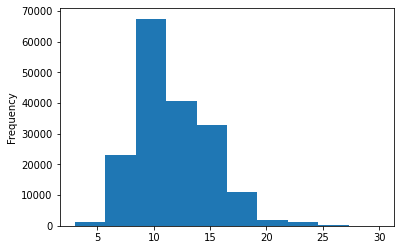

In [ ]:
train_df.total_lines.plot.hist();

D∆∞·ªùng nh∆∞ h·∫ßu h·∫øt c√°c abstract d√†i kho·∫£ng 7 ƒë·∫øn 15 c√¢u.

Ch√∫ng ta n√™n ki·ªÉm tra nh·ªØng ƒëi·ªÅu n√†y ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng khi ch√∫ng ta hu·∫•n luy·ªán ho·∫∑c ki·ªÉm tra m·ªôt m√¥ h√¨nh tr√™n c√°c m·∫´u ch∆∞a bi·∫øt, k·∫øt qu·∫£ s·∫Ω kh√¥ng k·ª≥ l·∫°.

### L·∫•y danh s√°ch c√°c c√¢u

Khi x√¢y d·ª±ng m√¥ h√¨nh h·ªçc s√¢u, m·ªôt trong nh·ªØng ƒë·∫ßu v√†o ch√≠nh c·ªßa m√¥ h√¨nh s·∫Ω l√† list c√°c string (c√°c d√≤ng c·ªßa abstract).

Ch√∫ng ta c√≥ th·ªÉ d·ªÖ d√†ng l·∫•y nh·ªØng th·ª© n√†y t·ª´ DataFrames c·ªßa m√¨nh b·∫±ng c√°ch g·ªçi ph∆∞∆°ng th·ª©c `tolist()` tr√™n c√°c c·ªôt `"text"`.

In [ ]:
# Chuy·ªÉn ƒë·ªïi c√°c d√≤ng vƒÉn b·∫£n abstract th√†nh c√°c list
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
# Xem 10 d√≤ng ƒë·∫ßu ti√™n c·ªßa c√¢u hu·∫•n luy·ªán
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

Ch√∫ng ta ƒë√£ t√°ch c√°c m·∫´u vƒÉn b·∫£n c·ªßa m√¨nh. Nh∆∞ b·∫°n c√≥ th·ªÉ ƒë√£ ƒëo√°n, ch√∫ng ta c·∫ßn vi·∫øt code ƒë·ªÉ chuy·ªÉn text th√†nh s·ªë tr∆∞·ªõc khi ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng n√≥ cho c√°c m√¥ h√¨nh h·ªçc m√°y, ch√∫ng ta s·∫Ω s·ªõm th·ª±c hi·ªán ƒëi·ªÅu n√†y.

## T·∫°o nh√£n d·∫°ng s·ªë (m√¥ h√¨nh h·ªçc m√°y c·∫ßn c√°c nh√£n d·∫°ng s·ªë)

Ch√∫ng ta s·∫Ω t·∫°o nh√£n one hot v√† nh√£n label encoded.

Ch√∫ng ta c√≥ th·ªÉ tr√°nh ƒë∆∞·ª£c vi·ªác ch·ªâ t·∫°o c√°c nh√£n label encoded tuy nhi√™n, h√†m m·∫•t m√°t CategoricalCrossentropy c·ªßa TensorFlow th√≠ch c√≥ m·ªôt nh√£n ƒë∆∞·ª£c m√£ h√≥a one hot (ƒëi·ªÅu n√†y s·∫Ω cho ph√©p ch√∫ng ta l√†m m·ªãn nh√£n sau n√†y).

ƒê·ªÉ m√£ h√≥a nh√£n b·∫±ng s·ªë, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng c√°c l·ªõp [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) v√† [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) c·ªßa Scikit-Learn.

In [ ]:
# Nh√£n One hot encode
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Ki·ªÉm tra xem c√°c nh√£n hu·∫•n luy·ªán tr√¥ng nh∆∞ th·∫ø n√†o
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Label encode labels

In [ ]:
# Tr√≠ch xu·∫•t nh√£n (c·ªôt "target") v√† m√£ h√≥a ch√∫ng th√†nh s·ªë nguy√™n
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Ki·ªÉm tra xem nh√£n hu·∫•n luy·ªán tr√¥ng nh∆∞ th·∫ø n√†o
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

Ch√∫ng ta ƒë√£ hu·∫•n luy·ªán m·ªôt instance c·ªßa `LabelEncoder`, ch√∫ng ta c√≥ th·ªÉ l·∫•y t√™n l·ªõp v√† s·ªë l·ªõp b·∫±ng c√°ch s·ª≠ d·ª•ng thu·ªôc t√≠nh `classes_`.

In [ ]:
# L·∫•y t√™n l·ªõp v√† s·ªë l·ªõp t·ª´ instance LabelEncoder
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## T·∫°o m·ªôt lo·∫°t c√°c th·ª≠ nghi·ªám l·∫≠p m√¥ h√¨nh

Ch√∫ng ta ƒë√£ x·ª≠ l√Ω d·ªØ li·ªáu n√™n b√¢y gi·ªù, theo quy tr√¨nh m√°y h·ªçc, c·∫ßn thi·∫øt l·∫≠p m·ªôt lo·∫°t c√°c th·ª≠ nghi·ªám l·∫≠p m√¥ h√¨nh.

H√£y b·∫Øt ƒë·∫ßu b·∫±ng c√°ch t·∫°o m·ªôt m√¥ h√¨nh c∆° s·ªü ƒë∆°n gi·∫£n ƒë·ªÉ ƒë·∫°t ƒë∆∞·ª£c h·ªá s·ªë m√† ch√∫ng ta s·∫Ω c·ªë g·∫Øng ƒë√°nh b·∫°i th√¥ng qua vi·ªác x√¢y d·ª±ng c√°c m√¥ h√¨nh ng√†y c√†ng ph·ª©c t·∫°p h∆°n khi ch√∫ng ta ti·∫øn t·ªõi t√°i t·∫°o m√¥ h√¨nh chu·ªói ƒë∆∞·ª£c n√™u trong [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

Ch√∫ng ta s·∫Ω hu·∫•n luy·ªán t·ª´ng m√¥ h√¨nh tr√™n d·ªØ li·ªáu hu·∫•n luy·ªán v√† ƒë√°nh gi√° ch√∫ng tr√™n d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh.

## Model 0: T·∫°o m√¥ h√¨nh c∆° s·ªü

M√¥ h√¨nh ƒë·∫ßu ti√™n c·ªßa ch√∫ng ta s·∫Ω l√† TF-IDF Multinomial Naive Bayes, theo g·ª£i √Ω t·ª´ [machine learning map c·ªßa Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

ƒê·ªÉ x√¢y d·ª±ng, ch√∫ng ta s·∫Ω t·∫°o `Pipeline` c·ªßa Scikit-Learn, s·ª≠ d·ª•ng l·ªõp [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) ƒë·ªÉ chuy·ªÉn ƒë·ªïi c√°c c√¢u abstract th√†nh s·ªë b·∫±ng c√°ch s·ª≠ d·ª•ng thu·∫≠t to√°n TF-IDF, sau ƒë√≥ t√¨m hi·ªÉu c√°ch ph√¢n lo·∫°i c√°c c√¢u b·∫±ng c√°ch s·ª≠ d·ª•ng thu·∫≠t to√°n [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# T·∫°o pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Kh·ªõp pipeline v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán
model_0.fit(X=train_sentences,
            y=train_labels_encoded);

Do t·ªëc ƒë·ªô c·ªßa thu·∫≠t to√°n Multinomial Naive Bayes, n√™n n√≥ hu·∫•n luy·ªán r·∫•t nhanh.

Ch√∫ng ta c√≥ th·ªÉ ƒë√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh b·∫±ng ph∆∞∆°ng ph√°p `score()`.

In [ ]:
# ƒê√°nh gi√° m√¥ h√¨nh c∆° s·ªü tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh
model_0.score(X=val_sentences,
              y=val_labels_encoded)

0.7218323844829869

C√≥ v·∫ª nh∆∞ ƒë·ªô ch√≠nh x√°c 72.1% s·∫Ω ƒë√°nh b·∫°i v·ªõi c√°c m√¥ h√¨nh s√¢u h∆°n c·ªßa ch√∫ng ta.

B√¢y gi·ªù, ch√∫ng ta h√£y ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh c∆° s·ªü ƒë·ªÉ ƒë√°nh gi√° th√™m v·ªÅ n√≥.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

ƒê·ªÉ ƒë√°nh gi√° c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh c∆° s·ªü, ch√∫ng ta s·∫Ω import h√†m `calculate_results()` m√† ch√∫ng ta ƒë√£ t·∫°o trong [notebook tr∆∞·ªõc](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb) v√† th√™m n√≥ v√†o [script `helper_functions.py`](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py) ƒë·ªÉ so s√°nh ch√∫ng v·ªõi c√°c nh√£n g·ªëc.

C·ª• th·ªÉ h∆°n, h√†m `calculate_results()` s·∫Ω gi√∫p ch√∫ng ta c√≥ ƒë∆∞·ª£c:
* Accuracy
* Precision
* Recall
* F1-score

### Download t·∫≠p l·ªánh h√†m h·ªó tr·ª£

H√£y l·∫•y script `helper_functions.py` ƒë√£ d√πng ƒë·ªÉ l∆∞u tr·ªØ c√°c h√†m h·ªó tr·ª£ m√† ch√∫ng ta ƒë√£ t·∫°o trong c√°c notebook tr∆∞·ªõc ƒë√¢y.

In [ ]:
# Download t·∫≠p l·ªánh h√†m h·ªó tr·ª£
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-24 23:56:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‚Äòhelper_functions.py‚Äô

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-24 23:56:53 (89.8 MB/s) - ‚Äòhelper_functions.py‚Äô saved [10246/10246]



Ch√∫ng ta ƒë√£ c√≥ t·∫≠p l·ªánh c√°c h√†m tr·ª£ gi√∫p, h√£y import h√†m `caculate_results()` v√† xem m√¥ h√¨nh c∆° s·ªü c·ªßa ch√∫ng ta ho·∫°t ƒë·ªông nh∆∞ th·∫ø n√†o.

In [ ]:
# Import h√†m h·ªó tr·ª£ calculate_results
from helper_functions import calculate_results

In [ ]:
# T·∫°o baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

## Chu·∫©n b·ªã d·ªØ li·ªáu cho c√°c m√¥ h√¨nh chu·ªói s√¢u

Tuy·ªát! Ch√∫ng ta c√≥ m·ªôt m√¥ h√¨nh c∆° s·ªü ho·∫°t ƒë·ªông ƒë·ªÉ c·ªë g·∫Øng c·∫£i thi·ªán.

Nh∆∞ng tr∆∞·ªõc khi b·∫Øt ƒë·∫ßu x√¢y d·ª±ng c√°c m√¥ h√¨nh s√¢u h∆°n, ch√∫ng ta c·∫ßn t·∫°o layer vect∆° h√≥a v√† embedding layer.

Layer vect∆° h√≥a s·∫Ω chuy·ªÉn ƒë·ªïi vƒÉn b·∫£n th√†nh s·ªë v√† embedding layer s·∫Ω n·∫Øm b·∫Øt m·ªëi quan h·ªá gi·ªØa c√°c con s·ªë ƒë√≥.

To start creating our vectorization and embedding layers, we'll need to import the appropriate libraries (namely TensorFlow and NumPy). ƒê·ªÉ b·∫Øt ƒë·∫ßu t·∫°o vect∆° h√≥a v√† nh√∫ng c√°c l·ªõp c·ªßa ch√∫ng ta, ch√∫ng ta s·∫Ω c·∫ßn nh·∫≠p c√°c th∆∞ vi·ªán th√≠ch h·ª£p (c·ª• th·ªÉ l√† TensorFlow v√† NumPy).

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

Ch√∫ng ta s·∫Ω chuy·ªÉn c√°c c√¢u c·ªßa m√¨nh th√†nh s·ªë, n√™n h√£y t√≠nh xem c√≥ bao nhi√™u t·ª´ trong m·ªói c√¢u.

Khi m√¥ h√¨nh ƒëi qua c√°c c√¢u, n√≥ ho·∫°t ƒë·ªông t·ªët nh·∫•t khi ch√∫ng c√≥ c√πng ƒë·ªô d√†i (ƒëi·ªÅu n√†y r·∫•t quan tr·ªçng ƒë·ªÉ t·∫°o ra c√°c batch c√≥ tensor c√πng k√≠ch th∆∞·ªõc).

V√≠ d·ª•: n·∫øu m·ªôt c√¢u d√†i t√°m t·ª´ v√† m·ªôt c√¢u kh√°c d√†i 29 t·ª´, ch√∫ng ta c·∫ßn ƒë·ªám c√¢u t√°m t·ª´ b·∫±ng c√°c s·ªë 0 ƒë·ªÉ n√≥ c√≥ c√πng ƒë·ªô d√†i v·ªõi c√¢u 29 t·ª´.

H√£y vi·∫øt m·ªôt √≠t code ƒë·ªÉ t√¨m ƒë·ªô d√†i trung b√¨nh c·ªßa c√°c c√¢u trong t·∫≠p hu·∫•n luy·ªán.

In [ ]:
# Trung b√¨nh m·ªói c√¢u d√†i bao nhi√™u?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # tr·∫£ v·ªÅ ƒë·ªô d√†i trung b√¨nh c·ªßa c√¢u (t√≠nh b·∫±ng token)

26.338269273494777

V·∫≠y c√≤n ph√¢n ph·ªëi c·ªßa ƒë·ªô d√†i c√¢u?

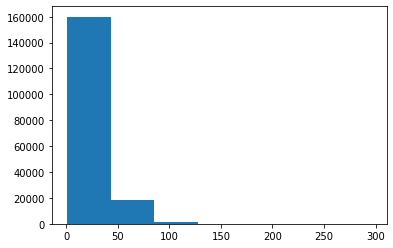

In [ ]:
# Ph√¢n ph·ªëi tr√¥ng nh∆∞ th·∫ø n√†o?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

C√≥ v·∫ª nh∆∞ ph·∫ßn l·ªõn c√°c c√¢u c√≥ ƒë·ªô d√†i t·ª´ 0 ƒë·∫øn 50 token.

Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng [`percentile`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) c·ªßa NumPy ƒë·ªÉ t√¨m gi√° tr·ªã chi·∫øm 95% ƒë·ªô d√†i c√¢u.

In [ ]:
# ƒê·ªô d√†i c·ªßa c√¢u chi·∫øm 95% ƒë·ªô d√†i l√† bao nhi√™u?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

Tuy·ªát v·ªùi! C√≥ v·∫ª nh∆∞ 95% c√°c c√¢u trong t·∫≠p hu·∫•n luy·ªán c·ªßa ch√∫ng ta c√≥ ƒë·ªô d√†i t·ª´ 55 token tr·ªü xu·ªëng.

Khi t·∫°o tokenization layer, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng gi√° tr·ªã n√†y ƒë·ªÉ t·∫•t c·∫£ c√°c c√¢u c√≥ c√πng m·ªôt ƒë·ªô d√†i, t·ª©c l√† c√°c c√¢u c√≥ ƒë·ªô d√†i d∆∞·ªõi 55 s·∫Ω ƒë∆∞·ª£c ƒë·ªám 0 v√† c√°c c√¢u c√≥ ƒë·ªô d√†i tr√™n 55 b·ªã c·∫Øt b·ªõt (c√°c t·ª´ sau ƒë·ªô d√†i th·ª© 55 b·ªã c·∫Øt b·ªè).

> ü§î **C√¢u h·ªèi:** T·∫°i sao l·∫°i l√† 95%?

Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ƒë·ªô d√†i c√¢u t·ªëi ƒëa c·ªßa c√°c c√¢u trong t·∫≠p hu·∫•n luy·ªán.

In [ ]:
# ƒê·ªô d√†i c√¢u t·ªëi ƒëa trong t·∫≠p hu·∫•n luy·ªán
max(sent_lens)

296

Tuy nhi√™n, v√¨ h·∫ßu nh∆∞ kh√¥ng c√≥ b·∫•t k·ª≥ c√¢u n√†o d√†i g·∫ßn v·ªõi ƒë·ªô d√†i t·ªëi ƒëa, nghƒ©a l√† ph·∫ßn l·ªõn d·ªØ li·ªáu ch√∫ng ta chuy·ªÉn ƒë·∫øn m√¥ h√¨nh c·ªßa m√¨nh s·∫Ω l√† s·ªë 0 (t·∫•t c·∫£ c√°c c√¢u d∆∞·ªõi ƒë·ªô d√†i t·ªëi ƒëa s·∫Ω ƒë∆∞·ª£c ƒë·ªám b·∫±ng s·ªë 0).

> üîë **L∆∞u √Ω:** Ch√∫ng ta c·∫ßn tr·∫£i qua c√°c b∆∞·ªõc th·ª±c h√†nh khi l√†m vi·ªác v·ªõi kho ng·ªØ li·ªáu vƒÉn b·∫£n trong b√†i to√°n NLP. ƒê·ªÉ bi·∫øt c√°c m·∫´u c·ªßa m√¨nh d√†i bao nhi√™u v√† ch√∫ng ph√¢n b·ªë th·∫ø n√†o, h√£y xem ph·∫ßn 4 - Ph√¢n t√≠ch d·ªØ li·ªáu c·ªßa [t√†i li·ªáu PubMed 200k RCT](https://arxiv.org/pdf/1710.06071.pdf) ƒë·ªÉ bi·∫øt th√™m chi ti·∫øt.

### T·∫°o text vectorizer

B√¢y gi·ªù ch√∫ng ta ƒë√£ c√≥ th√™m m·ªôt √≠t th√¥ng tin v·ªÅ vƒÉn b·∫£n, h√£y t√¨m c√°ch bi·∫øn n√≥ th√†nh s·ªë.

ƒê·ªÉ th·ª±c hi·ªán, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng layer [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) t·ª´ TensorFlow.

Ch√∫ng ta s·∫Ω gi·ªØ t·∫•t c·∫£ c√°c tham s·ªë m·∫∑c ƒë·ªãnh, ngo·∫°i tr·ª´ `max_tokens` (s·ªë t·ª´ duy nh·∫•t trong t·∫≠p d·ªØ li·ªáu) v√† `output_sequence_length` (ƒë·ªô d√†i ƒë·∫ßu ra mong mu·ªën cho m·ªói c√¢u ƒë∆∞·ª£c vect∆° h√≥a).

Ph·∫ßn 3.2 c·ªßa [t√†i li·ªáu PubMed 200k RCT](https://arxiv.org/pdf/1710.06071.pdf) cho bi·∫øt k√≠ch th∆∞·ªõc t·ª´ v·ª±ng c·ªßa t·∫≠p d·ªØ li·ªáu PubMed 20k l√† 68,000. Do ƒë√≥, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng n√≥ l√†m tham s·ªë `max_tokens`.

In [ ]:
# C√≥ bao nhi√™u t·ª´ trong t·ª´ v·ª±ng? (l·∫•y t·ª´ ph·∫ßn 3.2 trong https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

Do ƒë√£ ph√°t hi·ªán ra ƒë·ªô d√†i c√¢u l√† 55 chi·∫øm 95% c√°c c√¢u hu·∫•n luy·ªán, n√™n ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng n√≥ l√†m tham s·ªë `output_sequence_length`.

In [ ]:
# T·∫°o text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # s·ªë t·ª´ trong vocabulary
                                    output_sequence_length=55) # ƒë·ªô d√†i ƒë·∫ßu ra mong mu·ªën c·ªßa chu·ªói ƒë∆∞·ª£c vect∆° h√≥a

Tuy·ªát! C√≥ v·∫ª nh∆∞ `text_vectorizer` ƒë√£ s·∫µn s√†ng, h√£y ƒëi·ªÅu ch·ªânh n√≥ sao cho ph√π h·ª£p v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán (ƒë·ªÉ n√≥ ƒë·ªçc d·ªØ li·ªáu hu·∫•n luy·ªán v√† t√¨m ra s·ªë n√†o bi·ªÉu di·ªÖn t·ª´ n√†o) r·ªìi ki·ªÉm tra.

In [ ]:
# ƒêi·ªÅu ch·ªânh text vectorizer th√†nh c√°c c√¢u hu·∫•n luy·ªán
text_vectorizer.adapt(train_sentences)

In [ ]:
# Ki·ªÉm tra text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
http://www.clinicaltrials.gov .

Length of text: 2

Vectorized text:
[[2243    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


Ch√∫ng ta ƒë√£ t√¨m ƒë∆∞·ª£c m·ªôt c√°ch ƒë·ªÉ bi·∫øn chu·ªói th√†nh s·ªë.

> üõ† **Luy·ªán t·∫≠p:** H√£y th·ª≠ ch·∫°y cell tr√™n h√†ng ch·ª•c l·∫ßn. B·∫°n th·∫•y g√¨ v·ªÅ c√°c chu·ªói c√≥ ƒë·ªô d√†i nh·ªè h∆°n 55?

Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c [`get_vocabulary()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) c·ªßa `text_vectorizer` ƒë·ªÉ t√¨m ra m·ªôt v√†i m·∫©u tin kh√°c nhau v·ªÅ text.

In [ ]:
# C√≥ bao nhi√™u t·ª´ trong training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


N·∫øu mu·ªën t√¨m c·∫•u h√¨nh c·ªßa `text_vectorizer`, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c `get_config()`.

In [ ]:
# T√¨m c·∫•u h√¨nh c·ªßa text vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True}

### T·∫°o text embedding t√πy ch·ªânh

Layer `token_vectorization` √°nh x·∫° c√°c t·ª´ trong vƒÉn b·∫£n tr·ª±c ti·∫øp th√†nh s·ªë. Tuy nhi√™n, ƒëi·ªÅu n√†y kh√¥ng nh·∫•t thi·∫øt ph·∫£i n·∫Øm b·∫Øt ƒë∆∞·ª£c m·ªëi quan h·ªá gi·ªØa nh·ªØng con s·ªë ƒë√≥.

ƒê·ªÉ vƒÉn b·∫£n bi·ªÉu di·ªÖn s·ªë phong ph√∫ h∆°n, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng **embedding**.

Khi m√¥ h√¨nh h·ªçc (b·∫±ng c√°ch xem qua nhi·ªÅu m·∫´u abstract v√† nh√£n kh√°c nhau), n√≥ s·∫Ω c·∫≠p nh·∫≠t embedding ƒë·ªÉ bi·ªÉu di·ªÖn t·ªët h∆°n m·ªëi quan h·ªá gi·ªØa c√°c token trong kho ng·ªØ li·ªáu.

Ch√∫ng ta c√≥ th·ªÉ t·∫°o m·ªôt embedding layer c√≥ th·ªÉ hu·∫•n luy·ªán b·∫±ng c√°ch s·ª≠ d·ª•ng layer [`Embedding`](https://www.tensorflow.org/tutorials/text/word_embeddings) c·ªßa TensorFlow.

M·ªôt l·∫ßn n·ªØa, c√°c tham s·ªë ch√≠nh m√† ch√∫ng ta quan t√¢m ·ªü ƒë√¢y l√† c√°c ƒë·∫ßu v√†o v√† ƒë·∫ßu ra c·ªßa layer `Embedding`.

Tham s·ªë `input_dim` x√°c ƒë·ªãnh k√≠ch th∆∞·ªõc t·ª´ v·ª±ng. C√≤n tham s·ªë `output_dim` x√°c ƒë·ªãnh k√≠ch th∆∞·ªõc c·ªßa ƒë·∫ßu ra embedding.

Sau khi t·∫°o, embedding layer s·∫Ω l·∫•y c√°c ƒë·∫ßu ra s·ªë nguy√™n c·ªßa layer `text_vectorization` l√†m ƒë·∫ßu v√†o v√† chuy·ªÉn ƒë·ªïi ch√∫ng th√†nh c√°c vect∆° ƒë·∫∑c tr∆∞ng c·ªßa k√≠ch th∆∞·ªõc `output_dim`.

H√£y xem ƒëi·ªÅu n√†y th·ª±c hi·ªán ra sao.

In [ ]:
# T·∫°o token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # ƒë·ªô d√†i c·ªßa vocabulary
                               output_dim=128, # L∆∞u √Ω: c√°c k√≠ch th∆∞·ªõc embedding kh√°c nhau d·∫´n ƒë·∫øn s·ªë l∆∞·ª£ng tham s·ªë ƒë·ªÉ hu·∫•n luy·ªán c≈©ng kh√°c nhau ƒë√°ng k·ªÉ
                               # S·ª≠ d·ª•ng mask ƒë·ªÉ x·ª≠ l√Ω ƒë·ªô d√†i chu·ªói thay ƒë·ªïi (ti·∫øt ki·ªám kh√¥ng gian)
                               mask_zero=True,
                               name="token_embedding")

# Hi·ªÉn th·ªã embedding m·∫´u
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
http://www.clinicaltrials.gov .

Sentence after vectorization (before embedding):
[[2243    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
[[[ 0.0105269   0.04210378  0.04194726 ...  0.0111946   0.02379807
   -0.0433928 ]
  [-0.02391002  0.04098249 -0.0333933  ...  0.01311035 -0.02968328
   -0.04724472]
  [-0.02391002  0.04098249 -0.0333933  ...  0.01311035 -0.02968328
   -0.04724472]
  ...
  [-0.02391002  0.04098249 -0.0333933  ...  0.01311035 -0.02968328
   -0.04724472]
  [-0.02391002  0.04098249 -0.0333933  ...  0.01311035 -0.02968328
   -0.04724472]
  [-0.02391002  0.04098249 -0.0333933  ...  0.01311035 -0.02968328
   -0.04724472]]]

Embedded sentence shape: (1, 55, 128)


## T·∫°o Datasets (nhanh nh·∫•t c√≥ th·ªÉ)

Ch√∫ng ta ƒë√£ g·∫∑p r·∫•t nhi·ªÅu kh√≥ khƒÉn khi ti·ªÅn x·ª≠ l√Ω t·∫≠p d·ªØ li·ªáu c·ªßa m√¨nh ƒë·ªÉ s·ª≠ d·ª•ng v·ªõi m√¥ h√¨nh h·ªçc m√°y, tuy nhi√™n, v·∫´n c√≥ m·ªôt s·ªë b∆∞·ªõc gi√∫p ch√∫ng ho·∫°t ƒë·ªông nhanh h∆°n v·ªõi m√¥ h√¨nh.

C·ª• th·ªÉ, `tf.data` API cung c·∫•p c√°c ph∆∞∆°ng ph√°p cho ph√©p load d·ªØ li·ªáu nhanh h∆°n.

> üìñ **T√†i li·ªáu:** ƒê·ªÉ bi·∫øt c√°c ph∆∞∆°ng ph√°p load d·ªØ li·ªáu hay nh·∫•t trong TensorFlow, h√£y tham kh·∫£o:
* [tf.data: X√¢y d·ª±ng TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
* [Ch·∫•t l∆∞·ª£ng t·ªët h∆°n v·ªõi tf.data API](https://www.tensorflow.org/guide/data_performance)

B∆∞·ªõc ch√≠nh m√† ch√∫ng ta s·∫Ω th·ª±c hi·ªán v·ªõi d·ªØ li·ªáu c·ªßa m√¨nh l√† bi·∫øn n√≥ th√†nh `PrefetchDataset` g·ªìm c√°c batch.

Nh∆∞ v·∫≠y, ch√∫ng ta s·∫Ω ƒë·∫£m b·∫£o TensorFlow load d·ªØ li·ªáu l√™n GPU nhanh nh·∫•t c√≥ th·ªÉ, do ƒë√≥ th·ªùi gian hu·∫•n luy·ªán nhanh h∆°n.

ƒê·ªÉ t·∫°o `PrefetchDataset` theo batch, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng c√°c ph∆∞∆°ng th·ª©c [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) v√† [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch), tham s·ªë [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE) c≈©ng cho ph√©p TensorFlow x√°c ƒë·ªãnh l∆∞·ª£ng t√≠nh to√°n t·ªëi ∆∞u c·∫ßn s·ª≠ d·ª•ng ƒë·ªÉ chu·∫©n b·ªã c√°c t·∫≠p d·ªØ li·ªáu.

In [ ]:
# Bi·∫øn d·ªØ li·ªáu th√†nh TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [ ]:
# L·∫•y d·ªØ li·ªáu c·ªßa TensorSliceDataset v√† bi·∫øn ch√∫ng th√†nh c√°c prefetched batch
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model 1: Conv1D v·ªõi token embedding

Ch√∫ng ta ƒë√£ t√¨m ƒë∆∞·ª£c c√°ch ƒë·ªÉ bi·ªÉu di·ªÖn vƒÉn b·∫£n v√† nh√£n b·∫±ng s·ªë, h√£y x√¢y d·ª±ng m·ªôt lo·∫°t c√°c m√¥ h√¨nh s√¢u ƒë·ªÉ th·ª≠ c·∫£i thi·ªán d·ª±a tr√™n m√¥ h√¨nh c∆° s·ªü.

T·∫•t c·∫£ c√°c m√¥ h√¨nh s√¢u c·ªßa ch√∫ng ta ƒë·ªÅu s·∫Ω tu√¢n theo m·ªôt c·∫•u tr√∫c gi·ªëng nhau:

```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

Th√†nh ph·∫ßn ch√≠nh m√† ch√∫ng ta s·∫Ω thay ƒë·ªïi xuy√™n su·ªët l√† `Layers`, do b·∫•t k·ª≥ m√¥ h√¨nh NLP s√¢u hi·ªán ƒë·∫°i n√†o c≈©ng ƒë·ªÅu y√™u c·∫ßu chuy·ªÉn ƒë·ªïi text th√†nh embedding tr∆∞·ªõc khi t√¨m th·∫•y c√°c pattern c√≥ √Ω nghƒ©a trong ƒë√≥.

M√¥ h√¨nh ƒë·∫ßu ti√™n m√† ch√∫ng ta s·∫Ω x√¢y d·ª±ng l√† M·∫°ng n∆°-ron 1 chi·ªÅu.

Ch√∫ng ta c≈©ng s·∫Ω tu√¢n theo quy tr√¨nh h·ªçc m√°y ti√™u chu·∫©n g·ªìm:
- X√¢y d·ª±ng m√¥ h√¨nh
- Hu·∫•n luy·ªán m√¥ h√¨nh
- ƒê√°nh gi√° m√¥ h√¨nh (ƒë∆∞a ra d·ª± ƒëo√°n v√† so s√°nh v·ªõi nh√£n g·ªëc)


In [ ]:
# T·∫°o m√¥ h√¨nh Conv1D ƒë·ªÉ x·ª≠ l√Ω c√°c chu·ªói
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vect∆° h√≥a ƒë·∫ßu v√†o text
token_embeddings = token_embed(text_vectors) # t·∫°o embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # c√¥ ƒë·ªçng ƒë·∫ßu ra c·ªßa vect∆° ƒë·∫∑c tr∆∞ng
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # n·∫øu nh√£n ·ªü d·∫°ng s·ªë nguy√™n (kh√¥ng ph·∫£i one hot), h√£y s·ª≠ d·ª•ng sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# L·∫•y summary c·ªßa m√¥ h√¨nh Conv1D
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
___________________________________________________

Tuy·ªát v·ªùi! Ch√∫ng ta ƒë√£ x√¢y d·ª±ng m√¥ h√¨nh chu·ªói s√¢u ƒë·∫ßu ti√™n v√† n√≥ ƒë√£ s·∫µn s√†ng ho·∫°t ƒë·ªông.

Ki·ªÉm tra summary c·ªßa m√¥ h√¨nh, b·∫°n s·∫Ω nh·∫≠n th·∫•y ph·∫ßn l·ªõn c√°c tham s·ªë c√≥ th·ªÉ hu·∫•n luy·ªán n·∫±m trong embedding layer. N·∫øu ch√∫ng ta tƒÉng k√≠ch th∆∞·ªõc c·ªßa embedding (b·∫±ng c√°ch tƒÉng tham s·ªë `output_dim` c·ªßa layer `Embedding`), th√¨ s·ªë l∆∞·ª£ng c√°c tham s·ªë c√≥ th·ªÉ hu·∫•n luy·ªán s·∫Ω tƒÉng l√™n ƒë√°ng k·ªÉ.

ƒê√£ ƒë·∫øn l√∫c kh·ªõp v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán, nh∆∞ng ch√∫ng ta s·∫Ω th·ª±c hi·ªán m·ªôt s·ª± thay c·∫©n tr·ªçng.

V√¨ d·ªØ li·ªáu hu·∫•n luy·ªán ch·ª©a g·∫ßn 200,000 c√¢u, n√™n vi·ªác kh·ªõp m·ªôt m√¥ h√¨nh s√¢u c√≥ th·ªÉ t·ªën m·ªôt ch√∫t th·ªùi gian, ngay c·∫£ v·ªõi GPU. V√¨ v·∫≠y, ƒë·ªÉ c√°c th·ª≠ nghi·ªám di·ªÖn ra nhanh ch√≥ng, ch√∫ng ta s·∫Ω ch·∫°y ch√∫ng tr√™n m·ªôt t·∫≠p h·ª£p con c·ªßa t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán.

C·ª• th·ªÉ h∆°n, ch√∫ng ta s·∫Ω ch·ªâ s·ª≠ d·ª•ng 10% batch ƒë·∫ßu ti√™n (kho·∫£ng 18,000 m·∫´u) c·ªßa t·∫≠p hu·∫•n luy·ªán ƒë·ªÉ hu·∫•n luy·ªán v√† 10% batch ƒë·∫ßu ti√™n t·ª´ t·∫≠p ki·ªÉm ƒë·ªãnh ƒë·ªÉ ki·ªÉm ƒë·ªãnh.

> üîë **L∆∞u √Ω:** Ph∆∞∆°ng ph√°p ti√™u chu·∫©n trong h·ªçc m√°y l√† ki·ªÉm tra m√¥ h√¨nh tr√™n c√°c t·∫≠p d·ªØ li·ªáu con nh·ªè h∆°n tr∆∞·ªõc ƒë·ªÉ ƒë·∫£m b·∫£o ch√∫ng ho·∫°t ƒë·ªông tr∆∞·ªõc khi co gi√£n ch√∫ng th√†nh l∆∞·ª£ng d·ªØ li·ªáu l·ªõn h∆°n. B·∫°n n√™n ƒë·∫∑t m·ª•c ti√™u ch·∫°y nhi·ªÅu th·ª≠ nghi·ªám nh·ªè h∆°n thay v√¨ ch·ªâ ch·∫°y m·ªôt √≠t c√°c th·ª≠ nghi·ªám l·ªõn. V√† v√¨ th·ªùi gian c√≥ h·∫°n, n√™n m·ªôt trong nh·ªØng c√°ch t·ªët nh·∫•t ƒë·ªÉ ch·∫°y c√°c th·ª≠ nghi·ªám nh·ªè h∆°n l√† gi·∫£m l∆∞·ª£ng d·ªØ li·ªáu b·∫°n ƒëang l√†m vi·ªác (10% t·∫≠p d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß th∆∞·ªùng l√† m·ªôt s·ªë l∆∞·ª£ng t·ªët, mi·ªÖn l√† n√≥ g·ªìm ph√¢n ph·ªëi t∆∞∆°ng t·ª±) .

In [ ]:
# Kh·ªõp m√¥ h√¨nh
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # ch·ªâ kh·ªõp tr√™n 10% c·ªßa batch ƒë·ªÉ th·ªùi gian hu·∫•n luy·ªán nhanh h∆°n
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # ch·ªâ ki·ªÉm ƒë·ªãnh tr√™n 10% c·ªßa batch

Epoch 1/3
562/562 [==============================] - 36s 8ms/step - loss: 0.9290 - accuracy: 0.6280 - val_loss: 0.6956 - val_accuracy: 0.7350
Epoch 2/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6647 - accuracy: 0.7528 - val_loss: 0.6353 - val_accuracy: 0.7666
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6231 - accuracy: 0.7742 - val_loss: 0.6017 - val_accuracy: 0.7839


Ch√∫ng ta ƒë√£ hu·∫•n luy·ªán m√¥ h√¨nh chu·ªói s√¢u ƒë·∫ßu ti√™n v√† kh√¥ng m·∫•t qu√° nhi·ªÅu th·ªùi gian (v√† n·∫øu ch√∫ng ta kh√¥ng n·∫°p s·ªõm d·ªØ li·ªáu theo batch, th√¨ s·∫Ω t·ªën nhi·ªÅu th·ªùi gian h∆°n).

ƒê√£ ƒë·∫øn l√∫c ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh, sau ƒë√≥ ƒë√°nh gi√° ch√∫ng.

In [ ]:
# ƒê√°nh gi√° tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh (ch√∫ng ta ch·ªâ ki·ªÉm ƒë·ªãnh tr√™n 10% c·ªßa batch trong qu√° tr√¨nh hu·∫•n luy·ªán)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.6040 - accuracy: 0.7845


[0.6039669513702393, 0.784489631652832]

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n (m√¥ h√¨nh ƒë∆∞a ra x√°c su·∫•t d·ª± ƒëo√°n cho t·ª´ng l·ªõp)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

array([[4.65810180e-01, 1.68030873e-01, 9.11973268e-02, 2.48495579e-01,
        2.64659580e-02],
       [3.85841161e-01, 3.26967925e-01, 1.09655075e-02, 2.69699097e-01,
        6.52625971e-03],
       [1.50063470e-01, 1.18270982e-02, 1.80714345e-03, 8.36278021e-01,
        2.42987626e-05],
       ...,
       [5.72754607e-06, 8.22585251e-04, 5.39675879e-04, 1.08408301e-06,
        9.98630941e-01],
       [5.39277196e-02, 4.82838809e-01, 9.59893093e-02, 5.87528460e-02,
        3.08491379e-01],
       [2.05477521e-01, 5.33861935e-01, 5.17199412e-02, 8.40113238e-02,
        1.24929301e-01]], dtype=float32)

In [ ]:
# Chuy·ªÉn ƒë·ªïi pred probs th√†nh c√°c l·ªõp
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# T√≠nh model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.44896067787634,
 'f1': 0.7822985872046467,
 'precision': 0.7814941086130403,
 'recall': 0.7844896067787634}

## Model 2: Feature extraction v·ªõi pretrained token embeddings

Qu√° tr√¨nh hu·∫•n luy·ªán embedding t·ªën m·ªôt ch√∫t th·ªùi gian, l√†m ch·∫≠m qu√° tr√¨nh th·ª≠ nghi·ªám.

V√¨ ch√∫ng ta ƒëang h∆∞·ªõng t·ªõi vi·ªác t√°i t·∫°o ki·∫øn ‚Äã‚Äãtr√∫c m√¥ h√¨nh trong [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), n√≥ ƒë·ªÅ c·∫≠p ƒë·∫øn vi·ªác h·ªç ƒë√£ s·ª≠ d·ª•ng [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) l√† c√°ch ƒë·ªÉ kh·ªüi t·∫°o token embedding.

ƒê·ªÉ m√¥ ph·ªèng ƒëi·ªÅu n√†y, h√£y xem ch√∫ng ta c√≥ th·ªÉ nh·∫≠n ƒë∆∞·ª£c k·∫øt qu·∫£ g√¨ v·ªõi [pretrained Universal Sentence Encoder embeddings t·ª´ TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4).

> üîë **L∆∞u √Ω:** Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng GloVe embeddings nh∆∞ng v√¨ ch√∫ng ta ƒëang l√†m vi·ªác v·ªõi TensorFlow n√™n h√£y s·ª≠ d·ª•ng nh·ªØng g√¨ c√≥ s·∫µn t·ª´ TensorFlow Hub (kh√¥ng s·ª≠ d·ª•ng GloVe embeddings). Ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng [pretrained GloVe embeddings](https://keras.io/examples/nlp/pretrained_word_embeddings/) l√†m ti·ªán √≠ch m·ªü r·ªông.

C·∫•u tr√∫c m√¥ h√¨nh nh∆∞ sau:

```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

B·∫°n s·∫Ω nh·∫≠n th·∫•y thi·∫øu tokenization layer m√† ch√∫ng ta ƒë√£ s·ª≠ d·ª•ng trong m√¥ h√¨nh tr∆∞·ªõc ƒë√≥. ƒê√≥ l√† do Universal Sentence Encoder (USE) (USE) ƒë·ªÉ √Ω tokenization gi√∫p ch√∫ng ta.

Lo·∫°i m√¥ h√¨nh n√†y ƒë∆∞·ª£c g·ªçi l√† transfer learning, hay c·ª• th·ªÉ h∆°n l√† **feature extraction transfer learning**. N√≥i c√°ch kh√°c l√† l·∫•y c√°c pattern m√† m√¥ h√¨nh ƒë√£ h·ªçc ·ªü n∆°i kh√°c v√† √°p d·ª•ng n√≥ v√†o b√†i to√°n c·ªßa ch√∫ng ta.

![TensorFlow Hub Universal Feature Encoder feature extractor model we're building](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-model-tf-hub-USE-to-dense-layer.png)
*M√¥ h√¨nh feature extractor m√† ch√∫ng ta ƒëang x√¢y d·ª±ng b·∫±ng c√°ch s·ª≠ d·ª•ng pretrained embedding t·ª´ TensorFlow Hub.*

ƒê·ªÉ download pretrained USE v√†o m·ªôt layer m√† ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng trong m√¥ h√¨nh c·ªßa m√¨nh, h√£y s·ª≠ d·ª•ng l·ªõp [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer).

Ch√∫ng ta s·∫Ω ƒë√≥ng bƒÉng c√°c pretrained embedding (b·∫±ng c√°ch ƒë·∫∑t `trainable=False`) v√† th√™m m·ªôt v√†i layer c√≥ th·ªÉ hu·∫•n luy·ªán ·ªü tr√™n c√πng ƒë·ªÉ ƒëi·ªÅu ch·ªânh k·∫øt qu·∫£ ƒë·∫ßu ra c·ªßa m√¥ h√¨nh cho ph√π h·ª£p v·ªõi d·ªØ li·ªáu.

> üîë **L∆∞u √Ω:** Do ph·∫£i download m·ªôt m√¥ h√¨nh t∆∞∆°ng ƒë·ªëi l·ªõn (~916MB), cell b√™n d∆∞·ªõi s·∫Ω t·ªën m·ªôt ch√∫t th·ªùi gian ƒë·ªÉ ch·∫°y.

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

Tuy·ªát, gi·ªù th√¨ pretrained USE ƒë√£ ƒë∆∞·ª£c download v√† kh·ªüi t·∫°o th√†nh `hub.KerasLayer` instance, h√£y th·ª≠ nghi·ªám n√≥ v·ªõi m·ªôt c√¢u ng·∫´u nhi√™n.

In [ ]:
# Th·ª≠ embedding trong m·ªôt c√¢u ng·∫´u nhi√™n
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
data were collected from @,@ @th - and @th-grade students in these communities using anonymous cross-sectional surveys in @ and @ and analyzed in @ .

Sentence after embedding:
[-0.03330918  0.06432742 -0.04426299 -0.03340627  0.01580565  0.04260787
  0.05223562  0.02998829 -0.09009711  0.01004721 -0.01640431 -0.02970598
  0.06300306  0.0500071  -0.02137795  0.01532154  0.00676913  0.04174187
  0.00070422 -0.08601078  0.02839869  0.07599191 -0.05524107 -0.00862489
 -0.04704431  0.05998407 -0.00028414 -0.01645767  0.05340267 -0.06473802] (truncated output)...

Length of sentence embedding:
512


Nh∆∞ ch√∫ng ta ƒë√£ ƒë·ªÅ c·∫≠p tr∆∞·ªõc ƒë√¢y, m√¥-ƒëun pretrained USE t·ª´ TensorFlow Hub s·∫Ω ƒë·∫£m nh·∫≠n vi·ªác tokenize text cho ch√∫ng ta v√† xu·∫•t ra m·ªôt vect∆° embedding 512 chi·ªÅu.

H√£y t·∫≠p h·ª£p l·∫°i v√† bi√™n d·ªãch m√¥ h√¨nh b·∫±ng c√°ch s·ª≠ d·ª•ng `tf_hub_embedding_layer`.

### X√¢y d·ª±ng v√† kh·ªõp m√¥ h√¨nh NLP feature extraction t·ª´ TensorFlow Hub

In [ ]:
# ƒê·ªãnh nghƒ©a m√¥ h√¨nh feature extractor s·ª≠ d·ª•ng TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text v√† t·∫°o embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # th√™m m·ªôt layer ƒë∆∞·ª£c k·∫øt n·ªëi ƒë·∫ßy ƒë·ªß l√™n ƒë·∫ßu c·ªßa embedding
# L∆∞u √Ω: ch√∫ng ta c√≥ th·ªÉ th√™m nhi·ªÅu layer ·ªü ƒë√¢y n·∫øu mu·ªën
outputs = layers.Dense(5, activation="softmax")(x) # t·∫°o layer ƒë·∫ßu ra
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Bi√™n d·ªãch m√¥ h√¨nh
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# L·∫•y summary c·ªßa m√¥ h√¨nh
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


Ki·ªÉm tra summary c·ªßa m√¥ h√¨nh, ch√∫ng ta c√≥ th·ªÉ th·∫•y c√≥ r·∫•t nhi·ªÅu tham s·ªë, tuy nhi√™n, ph·∫ßn l·ªõn tham s·ªë trong s·ªë n√†y kh√¥ng th·ªÉ hu·∫•n luy·ªán. ƒê√≥ l√† do ch√∫ng ta ƒë·∫∑t `training=False` khi kh·ªüi t·∫°o layer USE feature extractor.

V√¨ v·∫≠y, khi hu·∫•n luy·ªán m√¥ h√¨nh, ch·ªâ c√≥ hai layer ƒë·∫ßu ra tr√™n c√πng ƒë∆∞·ª£c hu·∫•n luy·ªán.

In [ ]:
# Kh·ªõp m√¥ h√¨nh feature extractor cho 3 epoch
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 12ms/step - loss: 0.9150 - accuracy: 0.6498 - val_loss: 0.7939 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7681 - accuracy: 0.7022 - val_loss: 0.7523 - val_accuracy: 0.7058
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7509 - accuracy: 0.7127 - val_loss: 0.7367 - val_accuracy: 0.7138


In [ ]:
# ƒê√°nh gi√° tr√™n to√†n b·ªô t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 10ms/step - loss: 0.7403 - accuracy: 0.7143


[0.7403141856193542, 0.7142525911331177]

V√¨ ch√∫ng ta kh√¥ng hu·∫•n luy·ªán embedding layer t√πy ch·ªânh c·ªßa ri√™ng m√¨nh n√™n vi·ªác hu·∫•n luy·ªán di·ªÖn ra nhanh h∆°n nhi·ªÅu.

H√£y ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v√† ƒë√°nh gi√° m√¥ h√¨nh feature extraction.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh feature extraction
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[4.3034002e-01, 3.5648319e-01, 2.3842952e-03, 2.0301045e-01,
        7.7820425e-03],
       [3.5814181e-01, 4.8381555e-01, 3.4082821e-03, 1.5132000e-01,
        3.3143654e-03],
       [2.2659931e-01, 1.5397042e-01, 2.1248475e-02, 5.6063354e-01,
        3.7548285e-02],
       ...,
       [1.7298853e-03, 5.6997794e-03, 5.2002735e-02, 8.3732005e-04,
        9.3973035e-01],
       [3.5631014e-03, 4.8854645e-02, 1.8445115e-01, 1.2047966e-03,
        7.6192635e-01],
       [1.7391451e-01, 3.0626863e-01, 4.5657125e-01, 5.7948320e-03,
        5.7450745e-02]], dtype=float32)

In [ ]:
# Chuy·ªÉn ƒë·ªïi d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh feature extraction th√†nh c√°c l·ªõp
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
# T√≠nh k·∫øt qu·∫£ t·ª´ TF Hub pretrained embeddings results tr√™n t·∫≠p ki·ªÉm ƒë·ªãnh
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.42526148550245,
 'f1': 0.7114550329161863,
 'precision': 0.7148806814011546,
 'recall': 0.7142526148550244}

## Model 3: Conv1D v·ªõi character embeddings



### T·∫°o tokenizer ·ªü c·∫•p k√Ω t·ª±

T√†i li·ªáu  [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) ƒë√£ ƒë·ªÅ c·∫≠p r·∫±ng m√¥ h√¨nh c·ªßa h·ªç s·ª≠ d·ª•ng k·∫øt h·ª£p token v√† character embedding.

Ch√∫ng ta ƒë√£ x√¢y d·ª±ng m√¥ h√¨nh v·ªõi token embedding t√πy ch·ªânh v√† pretrained token embedding, sao ch√∫ng ta t·∫°o m√¥ h√¨nh b·∫±ng character embedding?

S·ª± kh√°c bi·ªát gi·ªØa character embedding v√† token embedding l√† **character embedding** ƒë∆∞·ª£c t·∫°o b·∫±ng c√°ch s·ª≠ d·ª•ng c√°c chu·ªói ƒë∆∞·ª£c chia ra th√†nh c√°c k√Ω t·ª± (v√≠ d·ª•: `hello` -> [`h`, `e`, `l`, `l`, `o`]) trong khi ƒë√≥, **token embedding** ƒë∆∞·ª£c t·∫°o ra d·ª±a tr√™n c√°c chu·ªói ƒë∆∞·ª£c chia th√†nh c√°c token.

![example of difference between token level and character level embeddings](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-token-vs-character-embeddings.png)
*Token level embedding ph√¢n t√°ch chu·ªói th√†nh c√°c token (t·ª´) v√† nh√∫ng t·ª´ng chu·ªói trong s·ªë ƒë√≥, character embedding t√°ch chu·ªói th√†nh c√°c k√Ω t·ª± v√† t·∫°o m·ªôt vect∆° ƒë·∫∑c tr∆∞ng cho m·ªói k√Ω t·ª±.*

Ch√∫ng ta c√≥ th·ªÉ t·∫°o embedding ·ªü c·∫•p ƒë·ªô k√Ω t·ª± b·∫±ng c√°ch vect∆° h√≥a c√°c chu·ªói tr∆∞·ªõc ti√™n (sau khi ch√∫ng ƒë√£ ƒë∆∞·ª£c chia th√†nh c√°c k√Ω t·ª±) b·∫±ng c√°ch s·ª≠ d·ª•ng l·ªõp [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization), sau ƒë√≥ truy·ªÅn c√°c chu·ªói ƒë∆∞·ª£c vect∆° h√≥a ƒë√≥ qua layer [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

Tr∆∞·ªõc khi vect∆° h√≥a c√°c chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª±, ch√∫ng ta c·∫ßn chia ch√∫ng th√†nh c√°c k√Ω t·ª±. H√£y vi·∫øt m·ªôt h√†m ƒë·ªÉ th·ª±c hi·ªán nh∆∞ v·∫≠y.

In [ ]:
# T·∫°o h√†m ƒë·ªÉ t√°ch c√¢u th√†nh c√°c k√Ω t·ª±
def split_chars(text):
  return " ".join(list(text))

# Th·ª≠ nghi·ªám t√°ch chu·ªói kh√¥ng ·ªü c·∫•p ƒë·ªô k√Ω t·ª± th√†nh c√°c k√Ω t·ª±
split_chars(random_training_sentence)

'd a t a   w e r e   c o l l e c t e d   f r o m   @ , @   @ t h   -   a n d   @ t h - g r a d e   s t u d e n t s   i n   t h e s e   c o m m u n i t i e s   u s i n g   a n o n y m o u s   c r o s s - s e c t i o n a l   s u r v e y s   i n   @   a n d   @   a n d   a n a l y z e d   i n   @   .'

Tuy·ªát v·ªùi! C√≥ v·∫ª nh∆∞ h√†m t√°ch k√Ω t·ª± c·ªßa ch√∫ng ta ƒë√£ ho·∫°t ƒë·ªông. H√£y t·∫°o t·∫≠p d·ªØ li·ªáu c·∫•p ƒë·ªô k√Ω t·ª± b·∫±ng c√°ch t√°ch t·∫≠p d·ªØ li·ªáu chu·ªói c·ªßa ch√∫ng ta th√†nh c√°c k√Ω t·ª±.

In [ ]:
# Ph√¢n t√°ch d·ªØ li·ªáu ·ªü c·∫•p ƒë·ªô chu·ªói th√†nh ph√¢n t√°ch d·ªØ li·ªáu ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


ƒê·ªÉ t√¨m ƒë·ªô d√†i c·ªßa chu·ªói k√Ω t·ª± ƒë∆∞·ª£c vect∆° h√≥a, h√£y ki·ªÉm tra ph√¢n ph·ªëi ƒë·ªô d√†i chu·ªói k√Ω t·ª±.

In [ ]:
# ƒê·ªô d√†i k√Ω t·ª± trung b√¨nh l√† bao nhi√™u?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

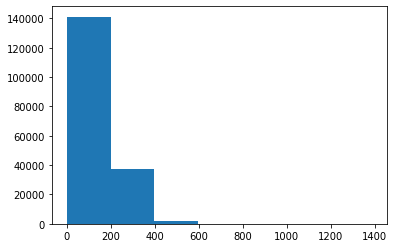

In [ ]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c√°c chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

C√≥ v·∫ª h·∫ßu h·∫øt c√°c chu·ªói c·ªßa ch√∫ng ta d√†i t·ª´ 0 ƒë·∫øn 200 k√Ω t·ª±.

H√£y s·ª≠ d·ª•ng percentile c·ªßa NumPy ƒë·ªÉ t√¨m ra ƒë·ªô d√†i chi·∫øm 95% chu·ªói.

In [ ]:
# T√¨m ƒë·ªô d√†i k√Ω t·ª± chi·∫øm 95% chu·ªói
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

Ch√∫ng ta ƒë√£ bi·∫øt ƒë·ªô d√†i chu·ªói chi·∫øm 95% chu·ªói, h√£y s·ª≠ d·ª•ng ƒë·ªô d√†i ƒë√≥ trong layer `TextVectorization` l√†m tham s·ªë `output_sequence_length`.

> üîë **L∆∞u √Ω:** Ch√∫ng ta c√≥ th·ªÉ th·ª≠ nghi·ªám ·ªü ƒë√¢y ƒë·ªÉ t√¨m `output_sequence_length` t·ªëi ∆∞u l√† bao nhi√™u, c√≥ l·∫Ω s·ª≠ d·ª•ng gi√° tr·ªã trung b√¨nh s·∫Ω cho k·∫øt qu·∫£ t·ªët nh∆∞ s·ª≠ d·ª•ng percentile 95%.

Ch√∫ng ta s·∫Ω ƒë·∫∑t `max_tokens` (t·ªïng s·ªë k√Ω t·ª± kh√°c nhau trong chu·ªói) th√†nh 28, hay n√≥i c√°ch kh√°c l√† 26 ch·ªØ c√°i trong b·∫£ng ch·ªØ c√°i + d·∫•u c√°ch + token OOV (h·∫øt t·ª´ v·ª±ng ho·∫∑c t·ª´ kh√¥ng x√°c ƒë·ªãnh).

In [ ]:
# L·∫•y t·∫•t c·∫£ c√°c k√Ω t·ª± t·ª´ b√†n ph√≠m cho char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# T·∫°o char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # s·ªë k√Ω t·ª± trong b·∫£ng ch·ªØ c√°i + d·∫•u c√°ch + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# ƒêi·ªÅu ch·ªânh character vectorizer ƒë·ªÉ hu·∫•n luy·ªán k√Ω t·ª±
char_vectorizer.adapt(train_chars)

Ch√∫ng ta ƒë√£ ƒëi·ªÅu ch·ªânh `char_vectorizer` v·ªõi c√°c chu·ªói c·∫•p ƒë·ªô k√Ω t·ª±, h√£y ki·ªÉm tra m·ªôt s·ªë ƒë·∫∑c ƒëi·ªÉm v·ªÅ n√≥ b·∫±ng ph∆∞∆°ng th·ª©c [`get_vocabulary()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization#get_vocabulary).

In [ ]:
# Ki·ªÉm tra ƒë·∫∑c ƒëi·ªÉm c·ªßa character vocabulary
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


Ch√∫ng ta c≈©ng c√≥ th·ªÉ ki·ªÉm tra n√≥ tr√™n c√°c chu·ªói k√Ω t·ª± ng·∫´u nhi√™n ƒë·ªÉ ƒë·∫£m b·∫£o n√≥ ƒëang ho·∫°t ƒë·ªông.

In [ ]:
# Ki·ªÉm tra character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
a   p e r s i s t e n t   q u e s t i o n   i s   w h e t h e r   p a r a p r o f e s s i o n a l   h o m e   v i s i t o r s   m i g h t   p r o d u c e   c o m p a r a b l e   e f f e c t s   .

Length of chars: 86

Vectorized chars:
[[ 5 14  2  8  9  4  9  3  2  6  3 26 16  2  9  3  4  7  6  4  9 20 13  2
   3 13  2  8 14  5  8  5 14  8  7 17  2  9  9  4  7  6  5 12 13  7 15  2
  21  4  9  4  3  7  8  9 15  4 18 13  3 14  8  7 10 16 11  2 11  7 15 14
   5  8  5 22 12  2  2 17 17  2 11  3  9  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0 

B·∫°n s·∫Ω nh·∫≠n th·∫•y c√°c chu·ªói c√≥ ƒë·ªô d√†i ng·∫Øn h∆°n 290 (`output_seq_char_length`) ƒë∆∞·ª£c ƒë·ªám b·∫±ng c√°c s·ªë kh√¥ng ·ªü cu·ªëi, ƒëi·ªÅu n√†y ƒë·∫£m b·∫£o t·∫•t c·∫£ c√°c chu·ªói ƒë∆∞·ª£c chuy·ªÉn ƒë·∫øn m√¥ h√¨nh c·ªßa ch√∫ng ta ƒë·ªÅu c√≥ c√πng ƒë·ªô d√†i.

Ngo√†i ra, do tham s·ªë `standardize` c·ªßa `TextVectorization` l√† `"lower_and_strip_punctuation"` v√† tham s·ªë `split` l√† `"whitespace"` theo m·∫∑c ƒë·ªãnh, n√™n c√°c k√Ω hi·ªáu (ch·∫≥ng h·∫°n nh∆∞ `@`) v√† d·∫•u c√°ch s·∫Ω b·ªã x√≥a.

> üîë **L∆∞u √Ω:** N·∫øu kh√¥ng mu·ªën x√≥a d·∫•u ch·∫•m c√¢u (gi·ªØ nguy√™n `@`, `%`,...), ch√∫ng ta c√≥ th·ªÉ t·∫°o m·ªôt h√†m chu·∫©n h√≥a t√πy ch·ªânh v√† truy·ªÅn n√≥ l√†m tham s·ªë `standardize`. Xem t√†i li·ªáu v·ªÅ l·ªõp [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) ƒë·ªÉ t√¨m hi·ªÉu th√™m.


### T·∫°o embedding ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
Ch√∫ng ta ƒë√£ c√≥ m·ªôt c√°ch ƒë·ªÉ vect∆° h√≥a chu·ªói c·∫•p ƒë·ªô k√Ω t·ª±, b√¢y gi·ªù h√£y t·∫°o embedding ·ªü c·∫•p ƒë·ªô k√Ω t·ª±.

C≈©ng gi·ªëng nh∆∞ token embedding t√πy ch·ªânh, ch√∫ng ta c√≥ th·ªÉ th·ª±c hi·ªán nh∆∞ v·∫≠y b·∫±ng c√°ch s·ª≠ d·ª•ng l·ªõp [`tensorflow.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

Layer embedding ·ªü c·∫•p ƒë·ªô k√Ω t·ª± y√™u c·∫ßu chi·ªÅu ƒë·∫ßu v√†o v√† chi·ªÅu ƒë·∫ßu ra.

Chi·ªÅu ƒë·∫ßu v√†o (`input_dim`) b·∫±ng s·ªë k√Ω t·ª± kh√°c nhau trong `char_vocab` (28). V√† v√¨ ch√∫ng ta ƒëang theo c·∫•u tr√∫c m√¥ h√¨nh trong H√¨nh 1 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), n√™n chi·ªÅu ƒë·∫ßu ra c·ªßa character embedding (`output_dim`) s·∫Ω l√† 25.

In [ ]:
# T·∫°o char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # s·ªë l∆∞·ª£ng k√Ω t·ª± kh√°c nhau
                              output_dim=25, # k√≠ch th∆∞·ªõc embedding c·ªßa m·ªói k√Ω t·ª± (gi·ªëng nh∆∞ H√¨nh 1 trong https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # kh√¥ng s·ª≠ d·ª•ng mask (ƒëi·ªÅu n√†y s·∫Ω l√†m r·ªëi tung model_5 n·∫øu ƒë∆∞·ª£c ƒë·∫∑t th√†nh True)
                              name="char_embed")

# Ki·ªÉm tra character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
a   p e r s i s t e n t   q u e s t i o n   i s   w h e t h e r   p a r a p r o f e s s i o n a l   h o m e   v i s i t o r s   m i g h t   p r o d u c e   c o m p a r a b l e   e f f e c t s   .

Embedded chars (after vectorization and embedding):
[[[-0.01923175 -0.01720572  0.04752548 ... -0.00952251 -0.03900822
   -0.01606651]
  [ 0.02746468 -0.0157405  -0.03408597 ...  0.00957409 -0.04426242
    0.02547267]
  [-0.00342412  0.04883511 -0.02929975 ... -0.04722989  0.04408958
    0.02328778]
  ...
  [-0.02053725  0.04947415 -0.03963646 ...  0.04780323  0.00831659
   -0.00033282]
  [-0.02053725  0.04947415 -0.03963646 ...  0.04780323  0.00831659
   -0.00033282]
  [-0.02053725  0.04947415 -0.03963646 ...  0.04780323  0.00831659
   -0.00033282]]]

Character embedding shape: (1, 290, 25)


Tuy·ªát v·ªùi! M·ªói k√Ω t·ª± trong chu·ªói bi·∫øn th√†nh m·ªôt embedding 25 chi·ªÅu.


### X√¢y d·ª±ng m√¥ h√¨nh Conv1D ƒë·ªÉ kh·ªõp v·ªõi character embeddings
Ch√∫ng ta ƒë√£ t√¨m ra c√°ch ƒë·ªÉ bi·∫øn c√°c chu·ªói ·ªü c·∫•p ƒë·ªô ƒë·ªô k√Ω t·ª± th√†nh s·ªë (`char_vectorizer`) c≈©ng nh∆∞ bi·ªÉu di·ªÖn ch√∫ng b·∫±ng s·ªë d∆∞·ªõi d·∫°ng embedding (`char_embed`), h√£y ki·ªÉm tra m·ª©c ƒë·ªô hi·ªáu qu·∫£ c·ªßa ch√∫ng trong vi·ªác m√£ h√≥a th√¥ng tin trong chu·ªói b·∫±ng c√°ch t·∫°o m√¥ h√¨nh chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª±.

M√¥ h√¨nh c√≥ c·∫•u tr√∫c gi·ªëng nh∆∞ m√¥ h√¨nh token embedding t√πy ch·ªânh (`model_1`), tr·ª´ vi·ªác n√≥ s·∫Ω l·∫•y chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª± l√†m ƒë·∫ßu v√†o thay v√¨ chu·ªói ·ªü c·∫•p ƒë·ªô token.

```
Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)
```


In [ ]:
# T·∫°o Conv1D ch·ªâ ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Bi√™n d·ªãch m√¥ h√¨nh
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Ki·ªÉm tra summary c·ªßa conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embed (Embedding)       (None, 290, 25)           1750      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 10,139
Trainable params: 10,139
Non-trainable params: 0
_________________________________

Tr∆∞·ªõc khi kh·ªõp m√¥ h√¨nh tr√™n d·ªØ li·ªáu, h√£y t·∫°o `PrefetchedDataset` theo batch ·ªü c·∫•p ƒë·ªô k√≠ t·ª±.

In [ ]:
# T·∫°o char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

C≈©ng gi·ªëng nh∆∞ m√¥ h√¨nh chu·ªói ·ªü c·∫•p ƒë·ªô token, ƒë·ªÉ ti·∫øt ki·ªám th·ªùi gian cho c√°c th·ª≠ nghi·ªám, ch√∫ng ta s·∫Ω kh·ªõp m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô k√Ω t·ª± tr√™n 10% batch.

In [ ]:
# Kh·ªõp m√¥ h√¨nh ch·ªâ ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 5ms/step - loss: 1.2697 - accuracy: 0.4940 - val_loss: 1.0555 - val_accuracy: 0.5864
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0124 - accuracy: 0.5996 - val_loss: 0.9542 - val_accuracy: 0.6267
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9228 - accuracy: 0.6410 - val_loss: 0.8712 - val_accuracy: 0.6722


In [ ]:
# ƒê√°nh gi√° model_3 tr√™n to√†n b·ªô validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.8873 - accuracy: 0.6588


[0.8873457908630371, 0.6587779521942139]

C√≥ v·∫ª m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô k√Ω t·ª± ƒëang ho·∫°t ƒë·ªông, h√£y ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v√† ƒë√°nh gi√° ch√∫ng.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n ch·ªâ v·ªõi m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô k√Ω t·ª±
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.14757556, 0.40572175, 0.06463172, 0.33147973, 0.05059117],
       [0.33927342, 0.25103244, 0.01815611, 0.35482603, 0.03671199],
       [0.15584646, 0.11993653, 0.10841523, 0.5846738 , 0.03112798],
       ...,
       [0.02389161, 0.04591153, 0.07370146, 0.01870138, 0.83779407],
       [0.01393123, 0.10044182, 0.55801105, 0.05441127, 0.2732046 ],
       [0.28039306, 0.582124  , 0.04549843, 0.04313584, 0.04884864]],
      dtype=float32)

In [ ]:
# Chuy·ªÉn ƒë·ªïi d·ª± ƒëo√°n th√†nh l·ªõp
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 3, 3, ..., 4, 2, 1])>

In [ ]:
# T√≠nh k·∫øt qu·∫£ ch·ªâ c·ªßa c·ªßa m√¥ h√¨nh Conv1D k√Ω t·ª±
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 65.87779690189329,
 'f1': 0.6516863332082763,
 'precision': 0.6545009464773592,
 'recall': 0.6587779690189329}

## Model 4: K·∫øt h·ª£p pretrained token embeddings + character embeddings (hybrid embedding layer)

B√¢y gi·ªù m·ªçi th·ª© ƒëang tr·ªü n√™n th√∫ v·ªã.

Khi ti·∫øn g·∫ßn h∆°n ƒë·∫øn vi·ªác x√¢y d·ª±ng m·ªôt m√¥ h√¨nh t∆∞∆°ng t·ª± nh∆∞ m√¥ h√¨nh trong H√¨nh 1 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), ƒë√£ ƒë·∫øn l√∫c ch√∫ng ta x·ª≠ l√Ω hybrid token embedding layer m√† h·ªç n√≥i t·ªõi.

Hybrid token embedding layer n√†y l√† s·ª± k·∫øt h·ª£p gi·ªØa token embedding v√† character embedding. N√≥i c√°ch kh√°c, ch√∫ng t·∫°o ra m·ªôt embedding x·∫øp ch·ªìng l√™n nhau ƒë·ªÉ bi·ªÉu di·ªÖn chu·ªói tr∆∞·ªõc khi truy·ªÅn ch√∫ng t·ªõi sequence label prediction layer.

Cho t·ªõi gi·ªù, ch√∫ng ta ƒë√£ x√¢y d·ª±ng hai m√¥ h√¨nh s·ª≠ d·ª•ng token ·ªü c·∫•p ƒë·ªô token v√† c·∫•p ƒë·ªô k√Ω t·ª±; tuy nhi√™n, hai m√¥ h√¨nh n√†y s·ª≠ d·ª•ng ri√™ng t·ª´ng embedding.

ƒê·ªÉ b·∫Øt ƒë·∫ßu t√°i t·∫°o (ho·∫∑c s·∫Øp t√°i t·∫°o) m√¥ h√¨nh trong H√¨nh 1, ch√∫ng ta s·∫Ω th·ª±c hi·ªán c√°c b∆∞·ªõc sau:
1. T·∫°o m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô token (t∆∞∆°ng t·ª± embedding)
2. T·∫°o m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô k√Ω t·ª± (t∆∞∆°ng t·ª± `model_3` v·ªõi m·ªôt ch√∫t s·ª≠a ƒë·ªïi ƒë·ªÉ so s√°nh v·ªõi t√†i li·ªáu)
3. K·∫øt h·ª£p (s·ª≠ d·ª•ng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) c√°c  ƒë·∫ßu ra c·ªßa 1 v√† 2
4. X√¢y d·ª±ng m·ªôt lo·∫°t c√°c layer ƒë·∫ßu ra tr√™n c√πng c·ªßa 3 layer t∆∞∆°ng t·ª± nh∆∞ H√¨nh 1 v√† ph·∫ßn 4.2 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. X√¢y d·ª±ng m·ªôt m√¥ h√¨nh l·∫•y chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª± v√† token l√†m ƒë·∫ßu v√†o v√† t·∫°o ra x√°c su·∫•t nh√£n chu·ªói l√†m ƒë·∫ßu ra

In [ ]:
# 1. Thi·∫øt l·∫≠p token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Thi·∫øt l·∫≠p char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM hi·ªÉn th·ªã trong H√¨nh 1 c·ªßa https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. N·ªëi token v√† char inputs (t·∫°o hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. T·∫°o layer ƒë·∫ßu ra - th√™m v√†o dropout ƒë√£ b√†n trong 4.2 c·ªßa https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # h∆°i kh√°c so v·ªõi H√¨nh 1 do shape kh√°c nhau c·ªßa c√°c token/char embedding layer
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. X√¢y d·ª±ng m√¥ h√¨nh v·ªõi char v√† token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

C√≥ r·∫•t nhi·ªÅu th·ª© ƒëang di·ªÖn ra ·ªü ƒë√¢y, h√£y l·∫•y summary v√† v·∫Ω s∆° ƒë·ªì m√¥ h√¨nh c·ªßa ch√∫ng ta ƒë·ªÉ h√¨nh dung nh·ªØng g√¨ ƒëang x·∫£y ra.

In [ ]:
# L·∫•y summary c·ªßa m√¥ h√¨nh token v√† character
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_input[0][0]                
__________________________________________________________________

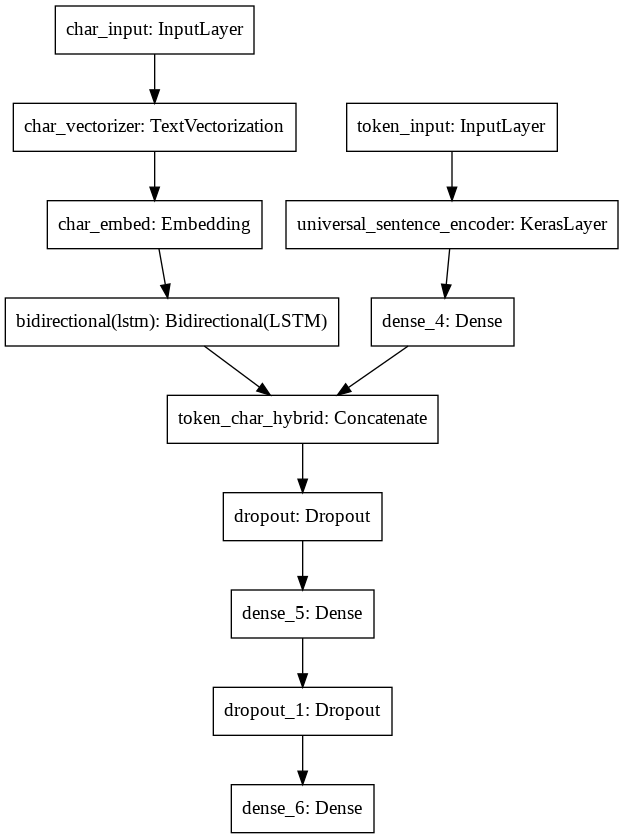

In [ ]:
# V·∫Ω m√¥ h√¨nh hybrid token v√† character
from tensorflow.keras.utils import plot_model
plot_model(model_4)

B√¢y gi·ªù m√¥ h√¨nh ƒë√≥ tr√¥ng kh√° t·ªët. H√£y bi√™n d·ªãch n√≥ c≈©ng nh∆∞ c√°c m√¥ h√¨nh c√≤n l·∫°i.

> üîë **L∆∞u √Ω:** Ph·∫ßn 4.2 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) ƒë·ªÅ c·∫≠p ƒë·∫øn vi·ªác s·ª≠ d·ª•ng SGD (stochastic gradient descent) optimizer, tuy nhi√™n, ƒë·ªÉ nh·∫•t qu√°n v·ªõi c√°c m√¥ h√¨nh kh√°c, ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng Adam optimizer. Ch√∫ng ta c√≥ th·ªÉ th·ª≠ s·ª≠ d·ª•ng [`tf.keras.optimizers.SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) thay v√¨ [`tf.keras.optimizers.Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) v√† so s√°nh c√°c k·∫øt qu·∫£ v·ªõi nhau.

In [ ]:
# Bi√™n d·ªãch m√¥ h√¨nh token char
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # ph·∫ßn 4.2 c·ªßa https://arxiv.org/pdf/1612.05251.pdf ƒë·ªÅ c·∫≠p t·ªõi vi·ªác s·ª≠ d·ª•ng SGD nh∆∞ng ch√∫ng ta v·∫´n s·∫Ω d√πng Adam
                metrics=["accuracy"])

M·ªôt l·∫ßn n·ªØa, ƒë·ªÉ c√°c th·ª≠ nghi·ªám di·ªÖn ra nhanh ch√≥ng, ch√∫ng ta s·∫Ω kh·ªõp m√¥ h√¨nh token-character-hybrid tr√™n 10% hu·∫•n luy·ªán v√† ki·ªÉm ƒë·ªãnh tr√™n 10% batch ki·ªÉm ƒë·ªãnh. Tuy nhi√™n, kh√°c bi·ªát ·ªü m√¥ h√¨nh n√†y l√† n√≥ y√™u c·∫ßu hai ƒë·∫ßu v√†o, chu·ªói ·ªü c·∫•p ƒë·ªô token v√† chu·ªói ·ªü c·∫•p ƒë·ªô k√Ω t·ª±.

Ch√∫ng ta c√≥ th·ªÉ th·ª±c hi·ªán ƒëi·ªÅu n√†y b·∫±ng c√°ch t·∫°o `tf.data.Dataset` v·ªõi m·ªôt tuple v√¨ n√≥ l√† ƒë·∫ßu v√†o ƒë·∫ßu ti√™n, ch·∫≥ng h·∫°n:
* `((token_data, char_data), (label))`

H√£y xem ƒëi·ªÅu n√†y ho·∫°t ƒë·ªông th·∫ø n√†o.

### K·∫øt h·ª£p d·ªØ li·ªáu token v√† d·ªØ li·ªáu k√Ω t·ª± th√†nh `tf.data` dataset

In [ ]:
# K·∫øt h·ª£p chars v√† tokens th√†nh m·ªôt dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # t·∫°o d·ªØ li·ªáu
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # t·∫°o nh√£n
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # k·∫øt h·ª£p d·ªØ li·ªáu v√† nh√£n

# D·ªØ li·ªáu prefetch v√† batch train
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# L·∫∑p l·∫°i c√°c b∆∞·ªõc t∆∞∆°ng t·ª± v·ªõi d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Ki·ªÉm tra training char v√† token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

### Kh·ªõp m√¥ h√¨nh tr√™n chu·ªói ·ªü c·∫•p ƒë·ªô token v√† c·∫•p ƒë·ªô k√≠ t·ª±

In [ ]:
# Kh·ªõp m√¥ h√¨nh tr√™n tokens v√† chars
model_4_history = model_4.fit(train_char_token_dataset, # hu·∫•n luy·ªán tr√™n dataset c·ªßa token v√† k√≠ t·ª±
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 24s 36ms/step - loss: 0.9654 - accuracy: 0.6159 - val_loss: 0.7859 - val_accuracy: 0.6898
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.7914 - accuracy: 0.6958 - val_loss: 0.7139 - val_accuracy: 0.7301
Epoch 3/3
562/562 [==============================] - 19s 34ms/step - loss: 0.7649 - accuracy: 0.7057 - val_loss: 0.6826 - val_accuracy: 0.7410


In [ ]:
# ƒê√°nh gi√° tr√™n to√†n b·ªô t·∫≠p ki·ªÉm ƒë·ªãnh
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 20s 21ms/step - loss: 0.6899 - accuracy: 0.7362


[0.6899493336677551, 0.7362306118011475]

M√¥ h√¨nh token-character hybrid ƒë√£ ƒëi v√†o ho·∫°t ƒë·ªông!

ƒê·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n v·ªõi n√≥, do n√≥ c·∫ßn nhi·ªÅu ƒë·∫ßu v√†o, ch√∫ng ta c√≥ th·ªÉ truy·ªÅn cho ph∆∞∆°ng th·ª©c `predict()` m·ªôt tuple c√≥ c√°c chu·ªói ·ªü c·∫•p ƒë·ªô token v√† c·∫•p ƒë·ªô k√Ω t·ª±.

Sau ƒë√≥, ch√∫ng ta c√≥ th·ªÉ ƒë√°nh gi√° c√°c d·ª± ƒëo√°n nh∆∞ ƒë√£ th·ª±c hi·ªán tr∆∞·ªõc ƒë√¢y.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh token-character hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

array([[4.5224771e-01, 3.3035564e-01, 2.7360097e-03, 2.0863818e-01,
        6.0224836e-03],
       [2.7638477e-01, 5.4655772e-01, 3.0270391e-03, 1.7166287e-01,
        2.3676162e-03],
       [3.1192392e-01, 1.4092967e-01, 4.3908428e-02, 4.5166326e-01,
        5.1574774e-02],
       ...,
       [6.1459269e-04, 5.8821058e-03, 4.2544805e-02, 1.3780949e-04,
        9.5082068e-01],
       [9.3976045e-03, 7.2958224e-02, 1.8798770e-01, 4.0314477e-03,
        7.2562498e-01],
       [2.6598454e-01, 3.5141158e-01, 2.8458366e-01, 3.5951469e-02,
        6.2068779e-02]], dtype=float32)

In [ ]:
# Bi·∫øn x√°c su·∫•t d·ª± ƒëo√°n th√†nh l·ªõp d·ª± ƒëo√°n
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
# Nh·∫≠n k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh token-char-hybrid
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.62306368330465,
 'f1': 0.7335613153664351,
 'precision': 0.7370751903809197,
 'recall': 0.7362306368330465}

## Model 5: Transfer Learning v·ªõi pretrained token embeddings + character embeddings + positional embeddings

C√≥ v·∫ª nh∆∞ vi·ªác k·∫øt h·ª£p token embedding v√† character embedding gi√∫p m√¥ h√¨nh tƒÉng m·ªôt ch√∫t ch·∫•t l∆∞·ª£ng.

Nh∆∞ng c√≤n m·ªôt th·ª© n·ªØa m√† ch√∫ng ta c√≥ th·ªÉ th√™m v√†o.

ƒêi·ªÅu g√¨ s·∫Ω x·∫£y ra n·∫øu ch√∫ng ta thi·∫øt k·∫ø c√°c ƒë·∫∑c tr∆∞ng c·ªßa ri√™ng m√¨nh v√†o m√¥ h√¨nh?

T·ª©c l√†, ƒëi·ªÅu g√¨ s·∫Ω x·∫£y ra n·∫øu ch√∫ng ta l·∫•y ki·∫øn ‚Äã‚Äãth·ª©c v·ªÅ d·ªØ li·ªáu v√† m√£ h√≥a n√≥ theo c√°ch s·ªë h·ªçc ƒë·ªÉ cung c·∫•p th√™m th√¥ng tin v·ªÅ c√°c m·∫´u cho m√¥ h√¨nh?

Qu√° tr√¨nh v·∫≠n d·ª•ng ki·∫øn ‚Äã‚Äãth·ª©c ƒë·ªÉ x√¢y d·ª±ng c√°c ƒë·∫∑c tr∆∞ng l√†m ƒë·∫ßu v√†o cho m·ªôt m√¥ h√¨nh ƒë∆∞·ª£c g·ªçi l√† **feature engineering (thi·∫øt k√© ƒë·∫∑c tr∆∞ng)**.

B·∫°n c√≥ th·ªÉ nghƒ© ra ƒëi·ªÅu g√¨ quan tr·ªçng v·ªÅ c√°c chu·ªói m√† ch√∫ng ta ƒëang c·ªë ph√¢n lo·∫°i kh√¥ng?

N·∫øu ch√∫ng ta xem m·ªôt abstract, b·∫°n c√≥ mong c√°c c√¢u xu·∫•t hi·ªán theo th·ª© t·ª± kh√¥ng? Hay s·∫Ω h·ª£p l√Ω n·∫øu ch√∫ng xu·∫•t hi·ªán m·ªôt c√°ch tu·∫ßn t·ª±? V√≠ d·ª•: c√°c chu·ªói c√≥ nh√£n `CONCLUSIONS` ·ªü ƒë·∫ßu v√† c√°c chu·ªói c√≥ nh√£n `OBJECTIVE` ·ªü cu·ªëi?

C√°c abstract th∆∞·ªùng theo th·ª© t·ª± tu·∫ßn t·ª±, ch·∫≥ng h·∫°n nh∆∞:
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

Ho·∫∑c

* `BACKGROUND` ...
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...
* `CONCLUSIONS` ...

T·∫•t nhi√™n, ch√∫ng ta kh√¥ng th·ªÉ t·ª± thi·∫øt k·∫ø sequence label th√†nh d·ªØ li·ªáu hu·∫•n luy·ªán (ch√∫ng ta kh√¥ng c√≥ nh·ªØng nh√£n n√†y t·∫°i th·ªùi ƒëi·ªÉm th·ª≠ nghi·ªám), tuy nhi√™n, ch√∫ng ta c√≥ th·ªÉ m√£ h√≥a th·ª© t·ª± c·ªßa m·ªôt t·∫≠p h·ª£p c√°c chu·ªói trong abstract.

V√≠ d·ª•:
* `Sentence 1 of 10` ...
* `Sentence 2 of 10` ...
* `Sentence 3 of 10` ...
* `Sentence 4 of 10` ...
* ...


Ch√∫ng ta c√≥ th·ªÉ nh·∫≠n th·∫•y ƒëi·ªÅu n√†y khi t·∫°o h√†m `preprocess_text_with_line_numbers()`. Khi ch√∫ng ta ƒë·ªçc trong m·ªôt file vƒÉn b·∫£n t√≥m t·∫Øt, ch√∫ng ta ƒë·∫øm s·ªë d√≤ng trong abstract c≈©ng nh∆∞ s·ªë l∆∞·ª£ng t·ª´ng d√≤ng.

Th·ª±c hi·ªán nh∆∞ v·∫≠y s·∫Ω d·∫´n ƒë·∫øn c√°c c·ªôt `"line_number"` v√† `"total_lines"` trong DataFrames.

In [ ]:
# Ki·ªÉm tra training dataframe
train_df.head()

target  ... total_lines
0  OBJECTIVE  ...          11
1    METHODS  ...          11
2    METHODS  ...          11
3    METHODS  ...          11
4    METHODS  ...          11

[5 rows x 4 columns]

C√°c c·ªôt `"line_number"` v√† `"total_lines"` l√† nh·ªØng ƒë·∫∑c tr∆∞ng kh√¥ng nh·∫•t thi·∫øt ph·∫£i ƒëi k√®m v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán nh∆∞ng c√≥ th·ªÉ truy·ªÅn t·ªõi m√¥ h√¨nh ·ªü d·∫°ng **positional embedding**. N√≥i c√°ch kh√°c, positional embedding l√† n∆°i m√† c√¢u xu·∫•t hi·ªán trong abstract.

Ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng c√°c ƒë·∫∑c tr∆∞ng n√†y v√¨ ch√∫ng s·∫Ω kh·∫£ d·ª•ng v√†o th·ªùi ƒëi·ªÉm th·ª≠ nghi·ªám.

![example of engineering features into our dataset to help our model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-engineered-features-at-test-time.png)
*V√¨ c√°c abstract th∆∞·ªùng c√≥ th·ª© t·ª± tu·∫ßn t·ª± (ch·∫≥ng h·∫°n: b·ªëi c·∫£nh, m·ª•c ti√™u, ph∆∞∆°ng ph√°p, k·∫øt qu·∫£, k·∫øt lu·∫≠n), n√™n c·∫ßn th√™m s·ªë d√≤ng c·ªßa c√¢u c·ª• th·ªÉ v√†o m√¥ h√¨nh. ƒêi·ªÅu tuy·ªát v·ªùi l√†, c√°c ƒë·∫∑c tr∆∞ng n√†y s·∫Ω kh·∫£ d·ª•ng v√†o th·ªùi ƒëi·ªÉm ki·ªÉm tra (ch√∫ng ta ch·ªâ c√≥ th·ªÉ ƒë·∫øm s·ªë c√¢u trong abstract v√† s·ªë l∆∞·ª£ng t·ª´ng c√¢u).*

C√≥ nghƒ©a l√†, n·∫øu ch√∫ng ta d·ª± ƒëo√°n nh√£n c·ªßa c√°c chu·ªói trong m·ªôt abstract m√† m√¥ h√¨nh ch∆∞a t·ª´ng th·∫•y, ch√∫ng ta c√≥ th·ªÉ ƒë·∫øm s·ªë d√≤ng, theo d√µi v·ªã tr√≠ c·ªßa t·ª´ng d√≤ng ri√™ng l·∫ª v√† chuy·ªÉn n√≥ v√†o m√¥ h√¨nh c·ªßa ch√∫ng ta.

> üõ† **Luy·ªán t·∫≠p:** M·ªôt c√°ch kh√°c ƒë·ªÉ t·∫°o ƒë·∫∑c tr∆∞ng positional embedding l√† k·∫øt h·ª£p c√°c c·ªôt `"line_number"` v√† `"total_lines"` th√†nh m·ªôt c·ªôt, v√≠ d·ª•: c·ªôt `"line_position"` c√≥ th·ªÉ ch·ª©a c√°c gi√° tr·ªã nh∆∞ `1_of_11`, `2_of_11`,... Trong ƒë√≥ `1_of_11` l√† d√≤ng ƒë·∫ßu ti√™n trong abstract d√†i 11 c√¢u. Sau khi th·ª±c hi·ªán c√°c b∆∞·ªõc sau, ch√∫ng ta c√≥ th·ªÉ s·∫Ω truy c·∫≠p l·∫°i giai ƒëo·∫°n positional embedding n√†y v√† xem c√°ch c·ªôt k·∫øt h·ª£p c·ªßa `"line_position"` v·ªõi hai c·ªôt ri√™ng bi·ªát kh√°c nhau th·∫ø n√†o.

### T·∫°o positional embedding

Ch√∫ng ta ƒë√£ n√≥i kh√° nhi·ªÅu v·ªÅ positional embedding, h√£y t·∫°o ch√∫ng th√¥i.

V√¨ c√°c c·ªôt `"line_number"` v√† `"total_line"` ·ªü d·∫°ng s·ªë, n√™n ch√∫ng ta c√≥ th·ªÉ truy·ªÅn ch√∫ng v√†o m√¥ h√¨nh

Nh∆∞ng ƒë·ªÉ tr√°nh m√¥ h√¨nh nghƒ© r·∫±ng d√≤ng c√≥ `"line_number"=5` l·ªõn h∆°n nƒÉm l·∫ßn so v·ªõi d√≤ng c√≥ `"line_number"=1`, n√™n ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng m√£ h√≥a one-hot ƒë·ªÉ m√£ h√≥a c√°c ƒë·∫∑c tr∆∞ng `"line_number"` v√† `"total_lines"`.

ƒê·ªÉ th·ª±c hi·ªán ƒëi·ªÅu n√†y, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng h√†m √≠ch l·ª£i [`tf.one_hot`](https://www.tensorflow.org/api_docs/python/tf/one_hot).

`tf.one_hot` tr·∫£ v·ªÅ tensor ƒë∆∞·ª£c m√£ h√≥a one-hot. N√≥ ch·∫•p nh·∫≠n m·ªôt m·∫£ng (ho·∫∑c tensor) l√†m ƒë·∫ßu v√†o v√† tham s·ªë `depth` x√°c ƒë·ªãnh chi·ªÅu c·ªßa tensor ƒë∆∞·ª£c tr·∫£ v·ªÅ.

ƒê·ªÉ bi·∫øt n√™n thi·∫øt l·∫≠p tham s·ªë `depth` nh∆∞ th·∫ø n√†o, h√£y ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c·ªôt `"line_number"`.

> üîë **L∆∞u √Ω:** Khi ƒë·ªÅ c·∫≠p ƒë·∫øn m√£ h√≥a one hot c√°c ƒë·∫∑c tr∆∞ng, l·ªõp [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) c·ªßa Scikit-Learn l√† m·ªôt l·ª±a ch·ªçn kh·∫£ thi kh√°c ·ªü ƒë√¢y.

In [ ]:
# C√≥ bao nhi√™u d√≤ng kh√°c nhau?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

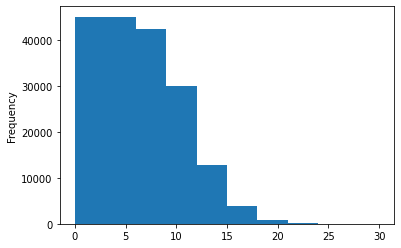

In [ ]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c·ªôt "line_number"
train_df.line_number.plot.hist()

Quan s√°t ph√¢n ph·ªëi c·ªßa c·ªôt `"line_number"`, c√≥ v·∫ª nh∆∞ ph·∫ßn l·ªõn c√°c d√≤ng c√≥ v·ªã tr√≠ t·ª´ 15 tr·ªü xu·ªëng.

Nh∆∞ v·∫≠y, h√£y ƒë·∫∑t tham s·ªë `depth` c·ªßa `tf.one_hot` th√†nh 15.

In [ ]:
# S·ª≠ d·ª•ng TensorFlow ƒë·ªÉ t·∫°o c√°c tensor ƒë∆∞·ª£c m√£ h√≥a one-hot cho c·ªôt "line_number"
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

ƒê·∫∑t tham s·ªë `depth` c·ªßa `tf.one_hot` th√†nh 15, c√≥ nghƒ©a l√† b·∫•t k·ª≥ m·∫´u n√†o c√≥ gi√° tr·ªã `"line_number"` tr√™n 15 s·∫Ω ƒë∆∞·ª£c ƒë·∫∑t th√†nh tensor c√≥ gi√° tr·ªã 0, trong ƒë√≥ b·∫•t k·ª≥ m·∫´u n√†o c√≥ `"line_number"` d∆∞·ªõi 15 s·∫Ω tr·ªü th√†nh tensor c√≥ gi√° tr·ªã 0 nh∆∞ng v·ªõi 1 ·ªü ch·ªâ m·ª•c b·∫±ng gi√° tr·ªã `"line_number"`.

> üîë **L∆∞u √Ω:** Ch√∫ng ta c√≥ th·ªÉ t·∫°o m·ªôt one-hot tensor c√≥ ch·ªó cho t·∫•t c·∫£ c√°c gi√° tr·ªã ti·ªÅm nƒÉng c·ªßa `"line_number"` (`depth=30`); tuy nhi√™n, ƒëi·ªÅu n√†y s·∫Ω khi·∫øn tensor tƒÉng g·∫•p ƒë√¥i k√≠ch th∆∞·ªõc hi·ªán t·∫°i (`depth=15`), trong ƒë√≥ ph·∫ßn l·ªõn gi√° tr·ªã l√† 0. Ngo√†i ra, ch·ªâ c√≥ ~2,000/180,000 m·∫´u c√≥ gi√° tr·ªã `"line_number"` tr√™n 15. Do v·∫≠y, ch√∫ng ta s·∫Ω kh√¥ng thu ƒë∆∞·ª£c nhi·ªÅu th√¥ng tin v·ªÅ d·ªØ li·ªáu ƒë·ªÉ tƒÉng g·∫•p ƒë√¥i kh√¥ng gian ƒë·∫∑c tr∆∞ng. Ki·ªÉu b√†i to√°n n√†y ƒë∆∞·ª£c g·ªçi l√† **curse of dimensionality**. Tuy nhi√™n, v√¨ ch√∫ng ta ƒëang l√†m vi·ªác v·ªõi c√°c m√¥ h√¨nh s√¢u, h√£y c·ªë g·∫Øng cung c·∫•p c√†ng nhi·ªÅu th√¥ng tin cho m√¥ h√¨nh c√†ng t·ªët v√† xem ƒëi·ªÅu g√¨ s·∫Ω x·∫£y ra. Ch√∫ng ta s·∫Ω kh√°m ph√° c√°c gi√° tr·ªã c·ªßa tham s·ªë `depth` ·ªü ph·∫ßn m·ªü r·ªông.

In [ ]:
# Ki·ªÉm  tra c√°c m·∫´u ƒë·∫∑c tr∆∞ng "line_number" ƒë∆∞·ª£c m√£ h√≥a one-hot
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]), <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.,

Ch√∫ng ta c√≥ th·ªÉ th·ª±c hi·ªán t∆∞∆°ng t·ª± cho c·ªôt `"line_number"` v·ªõi c·ªôt `"total_lines"`. ƒê·∫ßu ti√™n, h√£y t√¨m m·ªôt gi√° tr·ªã th√≠ch h·ª£p cho tham s·ªë `depth` c·ªßa `tf.one_hot`.

In [ ]:
# C√≥ bao nhi√™u d√≤ng kh√°c nhau ·ªü ƒë√¢y?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

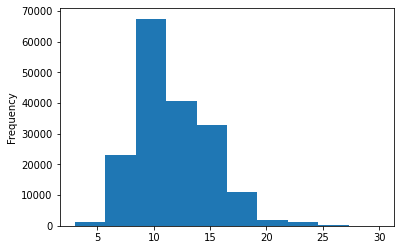

In [ ]:
# Ki·ªÉm tra ph√¢n ph·ªëi c·ªßa total lines
train_df.total_lines.plot.hist();

Quan s√°t ph√¢n ph·ªëi c·ªßa c·ªôt `"total_lines"`, c√≥ v·∫ª gi√° tr·ªã 20 chi·∫øm ph·∫ßn l·ªõn c√°c m·∫´u.

Ch√∫ng ta c√≥ th·ªÉ x√°c nh·∫≠n ƒëi·ªÅu n√†y v·ªõi [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).

In [ ]:
 # Ki·ªÉm tra ƒë·ªô bao ph·ªß c·ªßa gi√° tr·ªã "total_lines" 20
np.percentile(train_df.total_lines, 98) # gi√° tr·ªã 20 chi·∫øm 98% m·∫´u

20.0

N√≥ chi·∫øm kh√° nhi·ªÅu m·∫´u. H√£y m√£ h√≥a one-hot c·ªôt `"total_lines"` nh∆∞ ch√∫ng ta ƒë√£ l√†m v·ªõi c·ªôt `"line_number"`.

In [ ]:
# S·ª≠ d·ª•ng TensorFlow ƒë·ªÉ t·∫°o c√°c tensor ƒë∆∞·ª£c m√£ h√≥a one-hot cho c·ªôt "total_lines"
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Ki·ªÉm tra shape v√† c√°c m·∫´u c·ªßa total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

### X√¢y d·ª±ng m√¥ h√¨nh tribrid embedding

Tuy·ªát v·ªùi! C√°c Positional embedding tensor ƒë√£ s·∫µn s√†ng.

√£ ƒë·∫øn l√∫c x√¢y d·ª±ng m√¥ h√¨nh l·ªõn nh·∫•t m√† ch√∫ng ta t·ª´ng x√¢y d·ª±ng, k·∫øt h·ª£p token embedding, character embedding v√† positional embedding m·ªõi ƒë∆∞·ª£c t·∫°o.

Ch√∫ng ta s·∫Ω x√¢y d·ª±ng m·ªôt m√¥ h√¨nh ch∆∞a t·ª´ng kh√°m ph√° nh∆∞ng ch√∫ng ta ƒë·ªÅu n·∫Øm ƒë∆∞·ª£c m·ªçi th·ª© c·∫ßn thi·∫øt.

C·ª• th·ªÉ, ch√∫ng ta s·∫Ω th·ª±c hi·ªán c√°c b∆∞·ªõc sau:

1. T·∫°o m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô token (t∆∞∆°ng t·ª± `model_1`)
2. T·∫°o m√¥ h√¨nh ·ªü c·∫•p ƒë·ªô k√Ω t·ª± (t∆∞∆°ng t·ª± `model_3` v·ªõi m·ªôt ch√∫t s·ª≠a ƒë·ªïi ƒë·ªÉ so s√°nh v·ªõi t√†i li·ªáu)
3. T·∫°o m√¥ h√¨nh `"line_number"`(l·∫•y tensor `"line_number"` ƒë∆∞·ª£c m√£ h√≥a one-hot v√† truy·ªÅn n√≥ qua m·ªôt layer phi tuy·∫øn t√≠nh)
4. T·∫°o m√¥ h√¨nh `"total_lines"` (l·∫•y tensor `"total_lines"` ƒë∆∞·ª£c m√£ h√≥a one-hot v√† truy·ªÅn n√≥ qua m·ªôt layer phi tuy·∫øn t√≠nh)
5. K·∫øt h·ª£p (s·ª≠ d·ª•ng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) ƒë·∫ßu ra c·ªßa 1 v√† 2  th√†nh m·ªôt token-character-hybrid embedding v√† truy·ªÅn chu·ªói ƒë·∫ßu ra c·ªßa n√≥ cho H√¨nh 1 v√† ph·∫ßn  4.2 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. K·∫øt h·ª£p (s·ª≠ d·ª•ng [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) ƒë·∫ßu ra c·ªßa 3, 4 v√† 5 th√†nh m·ªôt token-character-positional tribrid embedding
7. T·∫°o m·ªôt layer ƒë·∫ßu ra ƒë·ªÉ ch·∫•p nh·∫≠n tribrid embedding v√† xu·∫•t ra c√°c x√°c su·∫•t nh√£n ƒë√£ d·ª± ƒëo√°n
8. K·∫øt h·ª£p c√°c ƒë·∫ßu v√†o c·ªßa 1, 2, 3, 4 v√† ƒë·∫ßu ra c·ªßa 7 th√†nh [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

R·∫•t nhi·ªÅu th·ª© c·∫ßn th·ª±c hi·ªán ... kh√¥ng c√≥ g√¨ m√† ch√∫ng ta kh√¥ng th·ª±c hi·ªán ƒë∆∞·ª£c. H√£y m√£ h√≥a n√≥.

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_embeddings)

# 2. Char inputs
char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)

# 5. K·∫øt h·ª£p token embeddings v√† char embeddings th√†nh hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

# 6. K·∫øt h·ª£p positional embeddings v·ªõi token v√† char embeddings ƒë√£ k·∫øt h·ª£p th√†nh tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])

# 7. T·∫°o output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

# 8. K·∫øt h·ª£p th√†nh m·ªôt m√¥ h√¨nh
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)

C√≥ r·∫•t nhi·ªÅu th·ª© ƒëang di·ªÖn ra ·ªü ƒë√¢y ... h√£y h√¨nh dung nh·ªØng g√¨ ƒëang x·∫£y ra v·ªõi summary b·∫±ng c√°ch v·∫Ω s∆° ƒë·ªì m√¥ h√¨nh.

In [ ]:
# L·∫•y summary c·ªßa m√¥ h√¨nh token, char v√† positional embedding
model_5.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_embed (Embedding)          (None, 290, 25)      1750        char_vectorizer[2][0]            
____________________________________________________________________________________________

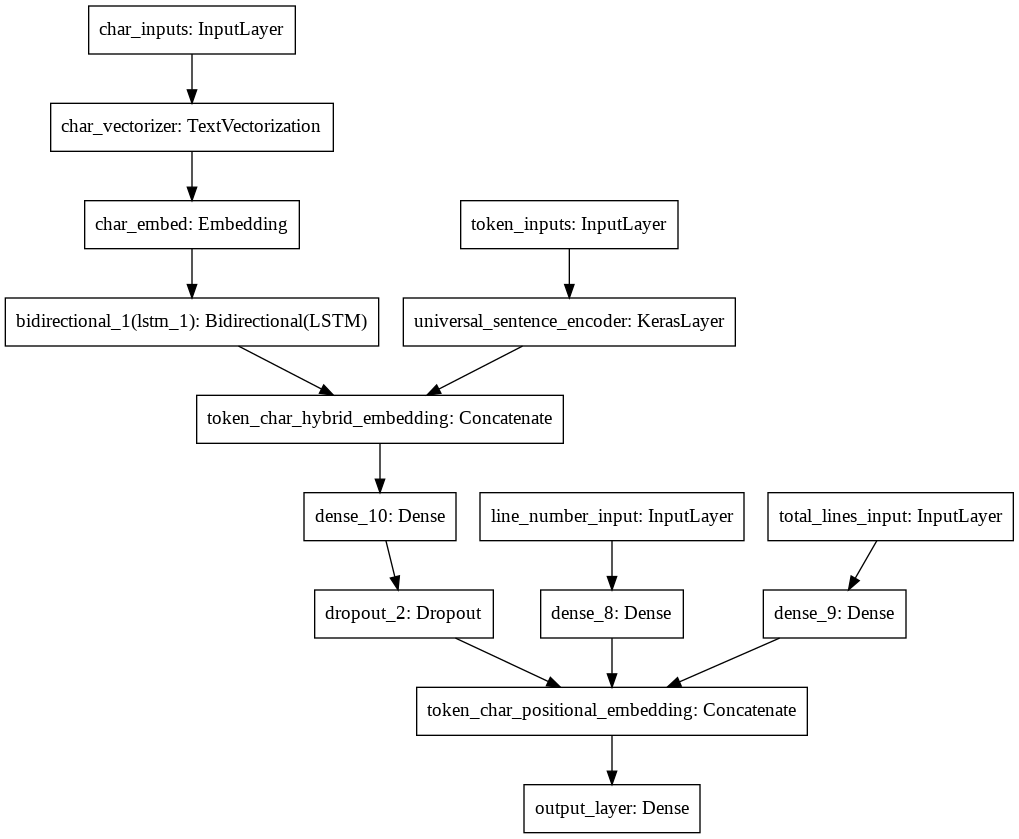

In [ ]:
# V·∫Ω m√¥ h√¨nh token, char, positional embedding
from tensorflow.keras.utils import plot_model
plot_model(model_5)

Vi·ªác tr·ª±c quan h√≥a m√¥ h√¨nh s·∫Ω gi√∫p n√≥ tr√¥ng d·ªÖ hi·ªÉu h∆°n nhi·ªÅu.

Nh√¨n chung, ch√∫ng ta ƒëang c·ªë g·∫Øng m√£ h√≥a nhi·ªÅu th√¥ng tin v·ªÅ chu·ªói nh·∫•t c√≥ th·ªÉ th√†nh c√°c embedding kh√°c nhau (ƒë·∫ßu v√†o cho m√¥ h√¨nh) ƒë·ªÉ m√¥ h√¨nh c√≥ c∆° h·ªôi t√¨m ra nh√£n n√†o thu·ªôc v·ªÅ chu·ªói (ƒë·∫ßu ra c·ªßa m√¥ h√¨nh).

B·∫°n s·∫Ω nh·∫≠n th·∫•y m√¥ h√¨nh c·ªßa ch√∫ng ta tr√¥ng r·∫•t gi·ªëng v·ªõi m√¥ h√¨nh ƒë∆∞·ª£c hi·ªÉn th·ªã trong H√¨nh 1 c·ªßa [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf). Tuy nhi√™n, v·∫´n c√≥ m·ªôt s·ªë ƒëi·ªÉm kh√°c bi·ªát:
* Ch√∫ng ta ƒëang s·ª≠ d·ª•ng pretrained TensorFlow Hub token embedding thay v√¨ GloVe emebdding.
* Ch√∫ng ta ƒëang s·ª≠ d·ª•ng Dense layer tr√™n ƒë·∫ßu token-character hybrid embedding thay v√¨ bi-LSTM layer.
* Ph·∫ßn 3.1.3 c·ªßa t√†i li·ªáu ƒë·ªÅ c·∫≠p ƒë·∫øn layer t·ªëi ∆∞u label sequence (gi√∫p ƒë·∫£m b·∫£o c√°c sequence label xu·∫•t hi·ªán theo th·ª© t·ª± ph√π h·ª£p) nh∆∞ng n√≥ kh√¥ng ƒë∆∞·ª£c hi·ªÉn th·ªã trong H√¨nh 1. ƒê·ªÉ b√π v√†o ph·∫ßn thi·∫øu c·ªßa layer n√†y trong m√¥ h√¨nh, ch√∫ng ta t·∫°o c√°c layer positional embedding.
* Ph·∫ßn 4.2 c·ªßa t√†i li·ªáu ƒë·ªÅ c·∫≠p ƒë·∫øn vi·ªác token embedding v√† character embedding ƒë∆∞·ª£c c·∫≠p nh·∫≠t trong qu√° tr√¨nh hu·∫•n luy·ªán, pretrained TensorFlow Hub embedding th√¨ v·∫´n b·ªã ƒë√≥ng bƒÉng.
* T√†i li·ªáu s·ª≠ d·ª•ng [`SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) optimizer, nh∆∞ng ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng [`Adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

T·∫•t c·∫£ nh·ªØng ƒëi·ªÉm kh√°c bi·ªát tr√™n ƒë·ªÅu l√† nh·ªØng ph·∫ßn m·ªü r·ªông ti·ªÅm nƒÉng c·ªßa d·ª± √°n n√†y.

In [ ]:
# Ki·ªÉm tra nh·ªØng layer n√†o c·ªßa m√¥ h√¨nh c√≥ th·ªÉ hu·∫•n luy·ªán
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1fa3d725d0> True
<keras.layers.preprocessing.text_vectorization.TextVectorization object at 0x7f1ecec2d0d0> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3d22210> True
<keras.layers.embeddings.Embedding object at 0x7f1ececbc8d0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7f1fa586e5d0> False
<keras.layers.wrappers.Bidirectional object at 0x7f1fa3dff090> True
<keras.layers.merge.Concatenate object at 0x7f1fb14effd0> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3ec1890> True
<keras.engine.input_layer.InputLayer object at 0x7f1fa3ef9610> True
<keras.layers.core.Dense object at 0x7f1fb14efbd0> True
<keras.layers.core.Dense object at 0x7f1fa3d9b110> True
<keras.layers.core.Dense object at 0x7f1fb14e4f10> True
<keras.layers.core.Dropout object at 0x7f1fb14efed0> True
<keras.layers.merge.Concatenate object at 0x7f1fb14e49d0> True
<keras.layers.core.Dense object at 0x7f1fb14f3790> True


M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫°o, h√£y bi√™n d·ªãch n√≥.

L·∫ßn n√†y, ch√∫ng ta s·∫Ω gi·ªõi thi·ªáu m·ªôt tham s·ªë m·ªõi cho h√†m m·∫•t m√°t l√† `label_smoothing`. `label_smoothing` gi√∫p ƒëi·ªÅu ch·ªânh m√¥ h√¨nh (ngƒÉn ch·∫∑n overfitting) b·∫±ng c√°ch ƒë·∫£m b·∫£o n√≥ kh√¥ng qu√° t·∫≠p trung v√†o vi·ªác √°p d·ª•ng m·ªôt nh√£n c·ª• th·ªÉ cho m·ªôt m·∫´u.

V√≠ d·ª•: thay v√¨ c√≥ d·ª± ƒëo√°n ƒë·∫ßu ra l√†:
* `[0.0, 0.0, 1.0, 0.0, 0.0]` cho m·ªôt m·∫´u (m√¥ h√¨nh r·∫•t t·ª± tin r·∫±ng nh√£n ƒë√∫ng l√† ch·ªâ s·ªë 2).

C√°c d·ª± ƒëo√°n c·ªßa n√≥ s·∫Ω tr·ªü n√™n m∆∞·ª£t m√† gi·ªëng nh∆∞:
* `[0.01, 0.01, 0.096, 0.01, 0.01]` t·∫°o ra m·ªôt k√≠ch ho·∫°t nh·ªè cho t·ª´ng nh√£n kh√°c, c√≥ hy v·ªçng c·∫£i thi·ªán kh·∫£ nƒÉng kh√°i qu√°t.

> üìñ **T√†i li·ªáu:** ƒê·ªÉ bi·∫øt th√™m v·ªÅ label smoothing, h√£y xem b√†i ƒëƒÉng tr√™n blog c·ªßa PyImageSearch: [*Label smoothing with Keras, TensorFlow, and Deep Learning*](https://www.pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/).

In [ ]:
# Bi√™n d·ªãch m√¥ h√¨nh token, char, positional embedding
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # th√™m label smoothing (c√°c m·∫´u th·ª±c s·ª± t·ª± tin s·∫Ω l√†m m·ªãn m·ªôt ch√∫t)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### T·∫°o tribrid embedding datasets v√† kh·ªõp m√¥ h√¨nh fit tribrid

M√¥ h√¨nh ƒë√£ bi√™n d·ªãch!

M·ªôt l·∫ßn n·ªØa, ƒë·ªÉ c√°c th·ª≠ nghi·ªám di·ªÖn ra nhanh ch√≥ng, h√£y l·∫•y 20,000 m·∫´u cho 3 epoch.

L·∫ßn n√†y m√¥ h√¨nh c·ªßa ch√∫ng ta y√™u c·∫ßu b·ªën ƒë·∫ßu v√†o ƒë·∫∑c tr∆∞ng:
1. Train line numbers one-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)

Ch√∫ng ta c√≥ th·ªÉ truy·ªÅn ch√∫ng d∆∞·ªõi d·∫°ng tuple v√†o ph∆∞∆°ng th·ª©c `tf.data.Dataset.from_tensor_slices()` ƒë·ªÉ t·∫°o c√°c `PrefetchedDataset` theo batch c√≥ shape th√≠ch h·ª£p.

In [ ]:
# T·∫°o training v√† validation datasets (t·∫•t c·∫£ 4 lo·∫°i ƒë·∫ßu v√†o)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # s·ªë d√≤ng
                                                                train_total_lines_one_hot, # t·ªïng s·ªë d√≤ng
                                                                train_sentences, # hu·∫•n luy·ªán token
                                                                train_chars)) # hu·∫•n luy·ªán char
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # hu·∫•n luy·ªán nh√£n
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # k·∫øt h·ª£p d·ªØ li·ªáu v√† nh√£n
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # bi·∫øn th√†nh c√°c batch v√† prefetch m·ªôt c√°ch h·ª£p l√Ω

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # bi·∫øn th√†nh c√°c batch v√† prefetch m·ªôt c√°ch h·ª£p l√Ω

# Ki·ªÉm tra shape ƒë·∫ßu v√†o
train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [ ]:
# Kh·ªõp m√¥ h√¨nh token, char v√† positional embedding
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 24s 36ms/step - loss: 1.1013 - accuracy: 0.7260 - val_loss: 0.9930 - val_accuracy: 0.8002
Epoch 2/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9771 - accuracy: 0.8114 - val_loss: 0.9606 - val_accuracy: 0.8268
Epoch 3/3
562/562 [==============================] - 19s 34ms/step - loss: 0.9627 - accuracy: 0.8180 - val_loss: 0.9493 - val_accuracy: 0.8271


M√¥ h√¨nh Tribrid ƒë∆∞·ª£c hu·∫•n luy·ªán! H√£y ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n v·ªõi n√≥ v√† ƒë√°nh gi√° ch√∫ng gi·ªëng nh∆∞ ch√∫ng ta ƒë√£ l√†m tr∆∞·ªõc ƒë√¢y.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh token-char-positional hybrid
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[0.51536554, 0.10340027, 0.01223736, 0.34324795, 0.02574881],
       [0.5037048 , 0.1263607 , 0.0476622 , 0.3120701 , 0.01020223],
       [0.31137902, 0.10944027, 0.11880615, 0.3917513 , 0.06862326],
       ...,
       [0.04232275, 0.09047632, 0.04658423, 0.02905692, 0.7915597 ],
       [0.03812133, 0.3116883 , 0.10215054, 0.02388792, 0.5241519 ],
       [0.18210074, 0.5038779 , 0.18253621, 0.03620264, 0.0952825 ]],
      dtype=float32)

In [ ]:
# Bi·∫øn x√°c su·∫•t d·ª± ƒëo√°n th√†nh l·ªõp d·ª± ƒëo√°n
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# T√≠nh to√°n c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh token-char-positional hybrid
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 82.6128690586522,
 'f1': 0.8250369638872138,
 'precision': 0.8244488224211757,
 'recall': 0.8261286905865219}

## So s√°nh c√°c k·∫øt qu·∫£ m√¥ h√¨nh

Ch√∫ng ta ƒë√£ ƒëi ƒë∆∞·ª£c m·ªôt ch·∫∑ng ƒë∆∞·ªùng d√†i, t·ª´ m√¥ h√¨nh c∆° s·ªü ƒë·∫øn hu·∫•n luy·ªán m·ªôt m√¥ h√¨nh ch·ª©a ba lo·∫°i embedding kh√°c nhau.

B√¢y gi·ªù, h√£y so s√°nh ch·∫•t l∆∞·ª£ng c·ªßa t·ª´ng m√¥ h√¨nh v·ªõi nhau.

Ch√∫ng ta c≈©ng c√≥ th·ªÉ so s√°nh m√¥ h√¨nh c·ªßa ch√∫ng ta v·ªõi t√†i li·ªáu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf).

V√¨ t·∫•t c·∫£ c√°c k·∫øt qu·∫£ m√¥ h√¨nh c·ªßa ch√∫ng ta ƒë·ªÅu n·∫±m trong dictionary, n√™n h√£y k·∫øt h·ª£p ch√∫ng th√†nh m·ªôt pandas DataFrame ƒë·ªÉ tr·ª±c quan h√≥a ch√∫ng.

In [ ]:
# K·∫øt h·ª£p c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh th√†nh m·ªôt DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

accuracy  precision    recall        f1
baseline                      72.183238   0.718647  0.721832  0.698925
custom_token_embed_conv1d     78.448961   0.781494  0.784490  0.782299
pretrained_token_embed        71.425261   0.714881  0.714253  0.711455
custom_char_embed_conv1d      65.877797   0.654501  0.658778  0.651686
hybrid_char_token_embed       73.623064   0.737075  0.736231  0.733561
tribrid_pos_char_token_embed  82.612869   0.824449  0.826129  0.825037

In [ ]:
# Gi·∫£m accuracy xu·ªëng c√πng thang ƒëo nh∆∞ c√°c ph√©p ƒëo kh√°c
all_model_results["accuracy"] = all_model_results["accuracy"]/100

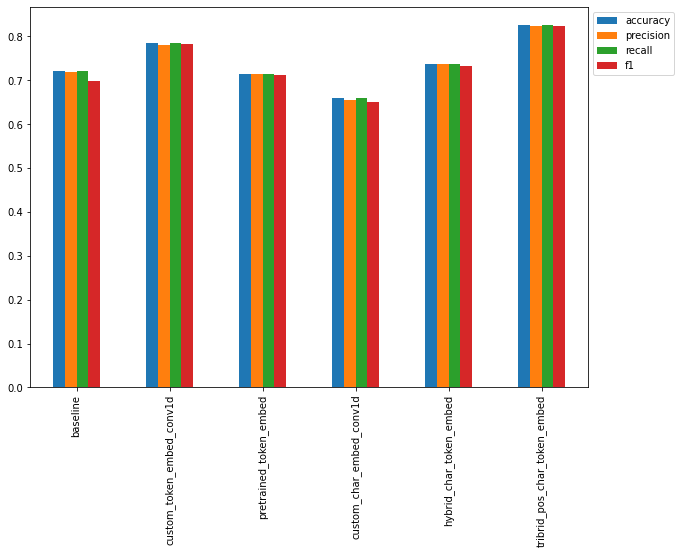

In [ ]:
# V·∫Ω v√† so s√°nh c√°c k·∫øt qu·∫£ c·ªßa m√¥ h√¨nh
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

V√¨ t√†i li·ªáu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) so s√°nh F1-score c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c th·ª≠ nghi·ªám tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra, ch√∫ng ta h√£y xem x√©t F1-score cho m√¥ h√¨nh c·ªßa ch√∫ng ta.

> üîë **L∆∞u √Ω:** Ch√∫ng ta c≈©ng c√≥ th·ªÉ th·ª±c hi·ªán nh·ªØng so s√°nh n√†y trong TensorBoard b·∫±ng c√°ch s·ª≠ d·ª•ng [`TensorBoard`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) callback trong qu√° tr√¨nh hu·∫•n luy·ªán.

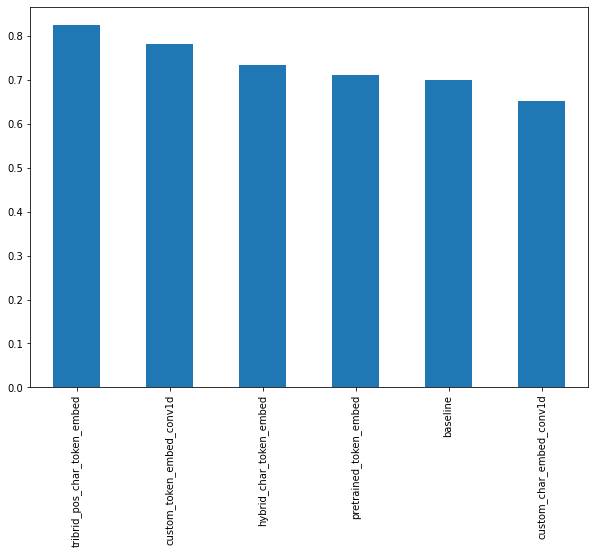

In [ ]:
# S·∫Øp x·∫øp k·∫øt qu·∫£ m√¥ h√¨nh theo f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Tuy·ªát! D·ª±a tr√™n F1-score, c√≥ v·∫ª nh∆∞ m√¥ h√¨nh tribrid embedding ho·∫°t ƒë·ªông t·ªët nh·∫•t v·ªõi bi√™n h·ª£p l√Ω.

M·∫∑c d√π v·∫≠y, so v·ªõi k·∫øt qu·∫£ ƒë∆∞·ª£c b√°o c√°o trong B·∫£ng 3 c·ªßa t√†i li·ªáu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf), F1-score c·ªßa m√¥ h√¨nh ch√∫ng ta v·∫´n ho·∫°t ƒë·ªông k√©m h∆°n (m√¥ h√¨nh c·ªßa t√°c gi·∫£ ƒë·∫°t ƒë∆∞·ª£c F1-score l√† 90.0 tr√™n T·∫≠p d·ªØ li·ªáu 20k RCT so v·ªõi F1-score c·ªßa ch√∫ng ta l√† ~82.6).

C·∫ßn l∆∞u √Ω m·ªôt s·ªë ƒëi·ªÅu v·ªÅ s·ª± kh√°c bi·ªát n√†y:
* C√°c m√¥ h√¨nh c·ªßa ch√∫ng ta (ngo·∫°i tr·ª´ m√¥ h√¨nh c∆° s·ªü) ƒë√£ hu·∫•n luy·ªán tr√™n ~18,000 (10% s·ªë batch) m·∫´u g·ªìm c√°c chu·ªói v√† nh√£n thay v√¨ ƒë·∫ßy ƒë·ªß ~180,000 m·∫´u trong t·∫≠p d·ªØ li·ªáu 20k RCT.
  * Tuy nhi√™n, ƒëi·ªÅu n√†y th∆∞·ªùng x·∫£y ra trong c√°c th·ª≠ nghi·ªám h·ªçc m√°y, h√£y ƒë·∫£m b·∫£o hu·∫•n luy·ªán tr√™n √≠t m·∫´u h∆°n, sau ƒë√≥ n√¢ng c·∫•p l√™n khi c·∫ßn thi·∫øt (ph·∫ßn m·ªü r·ªông cho d·ª± √°n n√†y s·∫Ω hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß).
* C√°c m·ª©c ƒë·ªô ch·∫•t l∆∞·ª£ng d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c ƒë√°nh gi√° tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm ƒë·ªãnh ch·ª© kh√¥ng ph·∫£i t·∫≠p d·ªØ li·ªáu ki·ªÉm tra (ch√∫ng ta s·∫Ω s·ªõm ƒë√°nh gi√° m√¥ h√¨nh t·ªët nh·∫•t tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra).

## L∆∞u v√† load m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t

Do ch√∫ng ta ƒë√£ th·ª±c hi·ªán m·ªôt s·ªë th·ª≠ nghi·ªám h·ª£p l√Ω, n√™n h√£y l∆∞u m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t ƒë·ªÉ ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng m√† kh√¥ng c·∫ßn hu·∫•n luy·ªán l·∫°i.

Ch√∫ng ta c√≥ th·ªÉ l∆∞u m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t c·ªßa m√¨nh b·∫±ng c√°ch g·ªçi ph∆∞∆°ng th·ª©c [`save()`](https://www.tensorflow.org/guide/keras/save_and_serialize#the_short_answer_to_saving_loading).

In [ ]:
# L∆∞u m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët nh·∫•t th√†nh ƒë·ªãnh d·∫°ng SavedModel (m·∫∑c ƒë·ªãnh)
model_5.save("skimlit_tribrid_model") # m√¥ h√¨nh s·∫Ω ƒë∆∞·ª£c l∆∞u v√†o ƒë∆∞·ªùng d·∫´n do string ch·ªâ ƒë·ªãnh

INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


INFO:tensorflow:Assets written to: skimlit_tribrid_model/assets


T√πy ch·ªçn: N·∫øu ƒëang s·ª≠ d·ª•ng Google Colab, b·∫°n c√≥ th·ªÉ sao ch√©p m√¥ h√¨nh ƒë√£ l∆∞u c·ªßa m√¨nh v√†o Google Drive (ho·∫∑c [download n√≥](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh)) ƒë·ªÉ c√≥ th√™m b·ªô nh·ªõ c·ªë ƒë·ªãnh (c√°c file Google Colab s·∫Ω bi·∫øn m·∫•t sau khi ng·∫Øt k·∫øt n·ªëi).

In [ ]:
# V√≠ d·ª• v·ªÅ vi·ªác sao ch√©p m√¥ h√¨nh ƒë√£ l∆∞u t·ª´ Google Colab sang Drive (y√™u c·∫ßu Google Drive)
# !cp skim_lit_best_model -r /content/drive/MyDrive/tensorflow_course/skim_lit


Gi·ªëng nh∆∞ t·∫•t c·∫£ c√°c ch∆∞∆°ng tr√¨nh n·∫•u ƒÉn, ch√∫ng ta c√≥ m·ªôt m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán tr∆∞·ªõc (gi·ªëng h·ªát ki·ªÉu m√¥ h√¨nh m√† ch√∫ng ta ƒë√£ t·∫°o cho `model_5` [ƒë∆∞·ª£c l∆∞u tr·ªØ tr√™n Google Storage](https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_best_model.zip)).

V√¨ v·∫≠y, ƒë·ªÉ ƒë·∫£m b·∫£o r·∫±ng ch√∫ng ta ƒë·ªÅu ƒëang s·ª≠ d·ª•ng c√πng m·ªôt m√¥ h√¨nh ƒë·ªÉ ƒë√°nh gi√°, h√£y download v√† load n√≥ v√†o.

Khi load v√†o m√¥ h√¨nh, v√¨ n√≥ s·ª≠ d·ª•ng m·ªôt v√†i [custom objects](https://www.tensorflow.org/guide/keras/save_and_serialize#custom_objects) ( TensorFlow Hub layer v√† layer `TextVectorization`), ch√∫ng ta c·∫ßn load n√≥ b·∫±ng c√°ch ch·ªâ ƒë·ªãnh ch√∫ng trong tham s·ªë `custom_objects` c·ªßa [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).



In [ ]:
# Download pretrained model t·ª´ Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
!mkdir skimlit_gs_model
!unzip skimlit_tribrid_model.zip -d skimlit_gs_model

--2021-08-25 00:03:10--  https://storage.googleapis.com/ztm_tf_course/skimlit/skimlit_tribrid_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962561955 (918M) [application/zip]
Saving to: ‚Äòskimlit_tribrid_model.zip‚Äô

skimlit_tribrid_mod 100%[===================>] 917.97M  40.9MB/s    in 12s     

2021-08-25 00:03:23 (74.5 MB/s) - ‚Äòskimlit_tribrid_model.zip‚Äô saved [962561955/962561955]

Archive:  skimlit_tribrid_model.zip
   creating: skimlit_gs_model/skimlit_tribrid_model/
   creating: skimlit_gs_model/skimlit_tribrid_model/variables/
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.index  
  inflating: skimlit_gs_model/skimlit_tribrid_model/variables/variables.data-00000-of-00001  
  inflating: skimlit_gs_model/skimlit_tribrid_mode

In [ ]:
# Import TensorFlow model dependencies (n·∫øu c·∫ßn) - https://github.com/tensorflow/tensorflow/issues/38250
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "skimlit_gs_model/skimlit_tribrid_model"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)#,
                                          # L∆∞u √Ω: v·ªõi TensorFlow t·ª´ b·∫£n 2.5 tr·ªü l√™n, n·∫øu SavedModel c√≥ file keras_metadata.pb
                                          # (ƒë∆∞·ª£c t·∫°o ra khi d√πng model.save()), ch√∫ng ta kh√¥ng c·∫ßn tham s·ªë custom_objects
                                          # T√¥i ƒë·ªÉ code b√™n d∆∞·ªõi trong tr∆∞·ªùng h·ª£p b·∫°n th·ª±c hi·ªán.
                                          # custom_objects={"TextVectorization": TextVectorization, # c·∫ßn thi·∫øt cho char vectorization
                                          #                 "KerasLayer": hub.KerasLayer}) # c·∫ßn thi·∫øt cho token embedding

### ƒê∆∞a ra d·ª± ƒëo√°n v√† ƒë√°nh gi√° v·ªõi truth label

ƒê·ªÉ ƒë·∫£m b·∫£o m√¥ h√¨nh ƒë∆∞·ª£c l∆∞u v√† load ch√≠nh x√°c, h√£y ƒë∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh ƒë√≥, ƒë√°nh gi√° ch√∫ng r·ªìi so s√°nh ch√∫ng v·ªõi k·∫øt qu·∫£ d·ª± ƒëo√°n m√† ch√∫ng ta ƒë√£ t√≠nh tr∆∞·ªõc ƒë√≥.

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªõi m√¥ h√¨nh ƒë√£ load tr√™n t·∫≠p ki·ªÉm ƒë·ªãnh
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 132s 139ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# ƒê√°nh gi√° c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh ƒë√£ load
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 82.74526678141136,
 'f1': 0.8264355957043299,
 'precision': 0.8258640600563426,
 'recall': 0.8274526678141136}

B√¢y gi·ªù, h√£y so s√°nh c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh ƒë√£ load v·ªõi k·∫øt qu·∫£ d·ª± ƒëo√°n m√† ch√∫ng ta thu ƒë∆∞·ª£c tr∆∞·ªõc khi l∆∞u m√¥ h√¨nh.

In [ ]:
# So s√°nh k·∫øt qu·∫£ m√¥ h√¨nh ƒë√£ load v·ªõi k·∫øt qu·∫£ m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ban ƒë·∫ßu (ph·∫£i kh√° s√°t nhau)
np.isclose(list(model_5_results.values()), list(loaded_model_results.values()), rtol=1e-02)

array([ True,  True,  True,  True])

C·∫ßn l∆∞u √Ω r·∫±ng vi·ªác load v√†o SavedModel s·∫Ω b·ªè ƒë√≥ng bƒÉng t·∫•t c·∫£ c√°c layer (khi·∫øn cho t·∫•t c·∫£ ch√∫ng ƒë·ªÅu c√≥ th·ªÉ hu·∫•n luy·ªán ƒë∆∞·ª£c). V√¨ v·∫≠y, n·∫øu b·∫°n mu·ªën ƒë√≥ng bƒÉng b·∫•t k·ª≥ layer n√†o, c·∫ßn ƒë·∫∑t thu·ªôc t√≠nh c√≥ th·ªÉ hu·∫•n luy·ªán th√†nh `False`.

In [ ]:
# Ki·ªÉm tra loaded model summary (ch√∫ √Ω s·ªë l∆∞·ª£ng tham s·ªë c√≥ th·ªÉ hu·∫•n luy·ªán ƒë∆∞·ª£c)
loaded_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, None)         0           char_inputs[0][0]                
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_embed (Embedding)          (None, None, 25)     1750        char_vectorizer[0][0]            
____________________________________________________________________________________________

## ƒê√°nh gi√° m√¥ h√¨nh tr√™n t·∫≠p ki·ªÉm tra

ƒê·ªÉ so s√°nh ch·∫•t l∆∞·ª£ng c·ªßa m√¥ h√¨nh v·ªõi k·∫øt qu·∫£ ƒë∆∞·ª£c b√°o c√°o trong B·∫£ng 3 c·ªßa t√†i li·ªáu [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf), h√£y ƒë∆∞a ra d·ª± ƒëo√°n tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra v√† ƒë√°nh gi√° ch√∫ng.

In [ ]:
# T·∫°o test dataset batch v√† prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Ki·ªÉm tra shapes
test_pos_char_token_dataset

<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 132s 140ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 3, 2, 2, 4, 4, 4, 1, 4, 0])>

In [ ]:
# Ki·ªÉm tra c√°c d·ª± ƒëo√°n c·ªßa loaded model test
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 82.39588518334163,
 'f1': 0.8229369808171064,
 'precision': 0.8225726116113812,
 'recall': 0.8239588518334163}

C√≥ v·∫ª nh∆∞ m√¥ h√¨nh t·ªët nh·∫•t c·ªßa ch√∫ng ta (cho ƒë·∫øn nay) v·∫´n c√≤n m·ªôt s·ªë c√°ch ƒë·ªÉ s√°nh v·ªõi ch·∫•t l∆∞·ª£ng c·ªßa k·∫øt qu·∫£ trong t√†i li·ªáu (m√¥ h√¨nh c·ªßa h·ªç ƒë·∫°t F1-score 90.0 tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra, trong khi c·ªßa ch√∫ng ta ƒë·∫°t ~82.1 F1-score).

Tuy nhi√™n, nh∆∞ ch√∫ng ta ƒë√£ th·∫£o lu·∫≠n tr∆∞·ªõc ƒë√¢y, m√¥ h√¨nh ch·ªâ ƒë∆∞·ª£c hu·∫•n luy·ªán tr√™n 20,000 trong t·ªïng s·ªë ~ 180,000 chu·ªói trong t·∫≠p d·ªØ li·ªáu RCT 20k. Ch√∫ng ta c≈©ng ch∆∞a tinh ch·ªânh pretrained embedding (t√†i li·ªáu tinh ch·ªânh GloVe embedding). V√¨ v·∫≠y, ch√∫ng ta c√≥ th·ªÉ th·ª≠ m·ªôt s·ªë ti·ªán √≠ch m·ªü r·ªông ƒë·ªÉ c·∫£i thi·ªán k·∫øt qu·∫£ c·ªßa m√¨nh.

## T√¨m c√°c d·ª± ƒëo√°n sai nh·∫•t

M·ªôt trong nh·ªØng c√°ch t·ªët nh·∫•t ƒë·ªÉ ƒëi·ªÅu tra xem m√¥ h√¨nh ƒëang sai ·ªü ƒë√¢u (c≈©ng c√≥ kh·∫£ nƒÉng l√† d·ªØ li·ªáu b·ªã sai) l√† tr·ª±c quan h√≥a c√°c d·ª± ƒëo√°n "sai nh·∫•t".

Nh·ªØng d·ª± ƒëo√°n sai nhi·ªÅu nh·∫•t l√† nh·ªØng m·∫´u m√† m√¥ h√¨nh ƒë∆∞a ra d·ª± ƒëo√°n v·ªõi x√°c su·∫•t cao nh∆∞ng l·∫°i sai (d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh kh√¥ng ph√π h·ª£p v·ªõi nh√£n g·ªëc).

Vi·ªác xem x√©t c√°c d·ª± ƒëo√°n sai nh·∫•t cung c·∫•p cho ch√∫ng ta th√¥ng tin gi√° tr·ªã v·ªÅ c√°ch c·∫£i thi·ªán c√°c m√¥ h√¨nh kh√°c ho·∫∑c s·ª≠a c√°c nh√£n trong d·ªØ li·ªáu c·ªßa ch√∫ng ta.

H√£y vi·∫øt code ƒë·ªÉ h√¨nh dung c√°c d·ª± ƒëo√°n sai nh·∫•t t·ª´ ‚Äã‚Äãt·∫≠p d·ªØ li·ªáu ki·ªÉm tra.

ƒê·∫ßu ti√™n, ch√∫ng ta s·∫Ω chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c√°c d·ª± ƒëo√°n ki·ªÉm tra d·ª±a tr√™n s·ªë nguy√™n th√†nh t√™n l·ªõp d·ª±a tr√™n string.

In [ ]:
%%time
# L·∫•y danh s√°ch t√™n l·ªõp c·ªßa c√°c d·ª± ƒëo√°n ki·ªÉm tra
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 10.2 s, sys: 856 ms, total: 11.1 s
Wall time: 9.42 s


B√¢y gi·ªù, h√£y l√†m phong ph√∫ test DataFame v·ªõi m·ªôt v√†i gi√° tr·ªã:
* C·ªôt `"prediction"` (string) ch·ª©a d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh cho m·ªôt m·∫´u nh·∫•t ƒë·ªãnh.
* C·ªôt `"pred_prob"` (float) ch·ª©a x√°c su·∫•t d·ª± ƒëo√°n t·ªëi ƒëa c·ªßa m√¥ h√¨nh cho m·ªôt m·∫´u nh·∫•t ƒë·ªãnh.
* C·ªôt `"correct"` (bool) ƒë·ªÉ cho bi·∫øt li·ªáu d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh c√≥ kh·ªõp v·ªõi nh√£n m·ª•c ti√™u c·ªßa m·∫´u hay kh√¥ng.

In [ ]:
# T·∫°o test dataframe ƒë√£ l√†m phong ph√∫ d·ª± ƒëo√°n
test_df["prediction"] = test_pred_classes # t·∫°o c·ªôt v·ªõi t√™n test prediction class
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # l·∫•y x√°c su·∫•t d·ª± ƒëo√°n t·ªëi ƒëa
test_df["correct"] = test_df["prediction"] == test_df["target"] # t·∫°o c·ªôt nh·ªã ph√¢n ƒë·ªÉ bi·∫øt d·ª± ƒëo√°n c√≥ ƒë√∫ng hay kh√¥ng
test_df.head(20)

target  ... correct
0    BACKGROUND  ...   False
1       RESULTS  ...   False
2       RESULTS  ...   False
3       RESULTS  ...   False
4       RESULTS  ...    True
5       RESULTS  ...    True
6       RESULTS  ...    True
7   CONCLUSIONS  ...    True
8   CONCLUSIONS  ...   False
9    BACKGROUND  ...    True
10   BACKGROUND  ...   False
11      METHODS  ...    True
12      METHODS  ...    True
13      METHODS  ...    True
14      RESULTS  ...    True
15      RESULTS  ...    True
16      RESULTS  ...    True
17      RESULTS  ...    True
18      RESULTS  ...    True
19      RESULTS  ...    True

[20 rows x 7 columns]

Tr√¥ng ƒë∆∞·ª£c ƒë·∫•y! C√≥ d·ªØ li·ªáu nh∆∞ v·∫≠y gi√∫p ch√∫ng ta d·ªÖ d√†ng thao t√°c v√† xem theo nhi·ªÅu c√°ch kh√°c nhau.

Ch√∫ng ta c√≥ n√™n s·∫Øp x·∫øp DataFrame c·ªßa m√¨nh ƒë·ªÉ t√¨m c√°c m·∫´u c√≥ `"pred_prob"` cao nh·∫•t v√† v·ªã tr√≠ d·ª± ƒëo√°n sai (`"correct" == False`) kh√¥ng?

In [ ]:
# T√¨m 100 m·∫´u sai nhi·ªÅu nh·∫•t (l∆∞u √Ω: 100 l√† s·ªë t√πy √Ω, b·∫°n c√≥ th·ªÉ xem qua t·∫•t c·∫£ n·∫øu mu·ªën)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

target  ... correct
16347   BACKGROUND  ...   False
13874  CONCLUSIONS  ...   False
1221       RESULTS  ...   False
13598      METHODS  ...   False
21382    OBJECTIVE  ...   False
...            ...  ...     ...
12269      RESULTS  ...   False
9881       RESULTS  ...   False
1220       RESULTS  ...   False
22105      RESULTS  ...   False
16840      RESULTS  ...   False

[100 rows x 7 columns]

Tuy·ªát (ho·∫∑c kh√¥ng qu√° tuy·ªát v·ªùi)! B√¢y gi·ªù ch√∫ng ta ƒë√£ c√≥ m·ªôt t·∫≠p h·ª£p con c√°c d·ª± ƒëo√°n sai nh·∫•t c·ªßa m√¥ h√¨nh, h√£y vi·∫øt m·ªôt √≠t code ƒë·ªÉ tr·ª±c quan h√≥a ch√∫ng.

In [ ]:
# Ki·ªÉm tra c√°c d·ª± ƒëo√°n sai nh·∫•t
for row in top_100_wrong[0:10].itertuples(): # ƒëi·ªÅu ch·ªânh ch·ªâ m·ª•c ƒë·ªÉ xem c√°c m·∫´u kh√°c nhau
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: BACKGROUND, Pred: OBJECTIVE, Prob: 0.9448384046554565, Line number: 0, Total lines: 12

Text:
to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .

-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9410986304283142, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9285234808921814, Line number: 3, Total lines: 13

Text:
data were collected prospectively for @ months beginning after completion of the first @ group clinic appointments ( @ months post randomization ) .

-----

Target: METHODS, Pred: RESULTS, Prob: 0.9181066155433655, Line number: 6, Total lines: 9

Text:
-@ % vs. fish : -@ % vs. fish + s : -@ % ; p < @ ) but there were no significant differences between groups .

-----

Target: OBJECTIVE, Pred: METHODS, Prob: 0.9180881381034851, Line number: 3, Total lines: 13

Text:
design , settings , participants , 

B·∫°n nh·∫≠n th·∫•y ƒëi·ªÅu g√¨ v·ªÅ nh·ªØng d·ª± ƒëo√°n sai nh·∫•t? M√¥ h√¨nh c√≥ m·∫Øc c√°c sai l·∫ßm ng·ªõ ng·∫©n kh√¥ng? Hay m·ªôt s·ªë nh√£n kh√¥ng ch√≠nh x√°c/m∆° h·ªì (v√≠ d·ª•: m·ªôt d√≤ng trong abstract c√≥ th·ªÉ b·ªã g·∫Øn nh√£n `OBJECTIVE` ho·∫∑c `BACKGROUND` v√† ƒëi·ªÅu n√†y h·ª£p l√Ω).

B∆∞·ªõc ti·∫øp theo, n·∫øu c√≥ m·ªôt v√†i m·∫´u c√≥ nh√£n kh√¥ng nh·∫•t qu√°n, ch√∫ng ta c√≥ th·ªÉ xem qua t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán, c·∫≠p nh·∫≠t nh√£n v√† sau ƒë√≥ hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh. Qu√° tr√¨nh s·ª≠ d·ª•ng m√¥ h√¨nh ƒë·ªÉ c·∫£i thi·ªán/ki·ªÉm tra nh√£n c·ªßa t·∫≠p d·ªØ li·ªáu th∆∞·ªùng g·ªçi l√† **active learning (h·ªçc ch·ªß ƒë·ªông)**.

## ƒê∆∞a ra c√°c d·ª± ƒëo√°n m·∫´u

Ch√∫ng ta ƒë√£ ƒë∆∞a ra m·ªôt s·ªë d·ª± ƒëo√°n tr√™n t·∫≠p d·ªØ li·ªáu ki·ªÉm tra, h√£y th·ª±c s·ª± ki·ªÉm tra m√¥ h√¨nh.

ƒê·ªÉ th·ª±c hi·ªán nh∆∞ v·∫≠y, ch√∫ng ta s·∫Ω l·∫•y m·ªôt √≠t d·ªØ li·ªáu t·ª´ t·ª± nhi√™n v√† xem m√¥ h√¨nh ho·∫°t ƒë·ªông nh∆∞ th·∫ø n√†o.

N√≥i c√°ch kh√°c, ch√∫ng ta s·∫Ω t√¨m m·ªôt RCT abstract t·ª´ PubMed, ti·ªÅn x·ª≠ l√Ω text ƒë·ªÉ n√≥ ho·∫°t ƒë·ªông trong m√¥ h√¨nh, sau ƒë√≥ truy·ªÅn t·ª´ng chu·ªói trong abstract qua m√¥ h√¨nh ƒë·ªÉ xem n√≥ d·ª± ƒëo√°n nh√£n n√†o.

ƒê·ªÉ c√≥ m·ªôt m·∫´u th√≠ch h·ª£p, ch√∫ng ta s·∫Ω c·∫ßn t√¨m PubMed cho RCT (Th·ª≠ nghi·ªám ƒë·ªëi ch·ª©ng ng·∫´u nhi√™n) m√† kh√¥ng c√≥ abstract ƒë√£ ph√¢n t√°ch (khi kh√°m ph√° PubMed, b·∫°n s·∫Ω nh·∫≠n th·∫•y nhi·ªÅu abstract ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng tr∆∞·ªõc th√†nh c√°c ph·∫ßn ri√™ng bi·ªát, gi√∫p d·ªÖ ƒë·ªçc h∆°n).

Tr·∫£i qua c√°c nghi√™n c·ª©u PubMed kh√°c nhau, t√¥i th·∫•y abstract kh√¥ng c√≥ c·∫•u tr√∫c sau ƒë√¢y t·ª´ [*RCT of a manualized social treatment for high-functioning autism spectrum disorders*](https://pubmed.ncbi.nlm.nih.gov/20232240/):

> This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.

Nh√¨n th·∫•y m·ªôt ƒëo·∫°n vƒÉn b·∫£n l·ªõn c√≥ v·∫ª kh√° ƒë√°ng s·ª£. Gi·∫£ s·ª≠ b·∫°n l√† m·ªôt nh√† nghi√™n c·ª©u y khoa, ƒëang c·ªë g·∫Øng ƒë·ªçc l∆∞·ªõt qua c√°c t√†i li·ªáu ƒë·ªÉ t√¨m m·ªôt nghi√™n c·ª©u c√≥ li√™n quan ƒë·∫øn c√¥ng vi·ªác c·ªßa b·∫°n.

Nghe c√≥ v·∫ª kh√° th√°ch th·ª©c ph·∫£i kh√¥ng?

H√£y nh·∫≠p SkimLit ü§ìüî•!

H√£y xem m√¥ h√¨nh t·ªët nh·∫•t c·ªßa ch√∫ng ta cho ƒë·∫øn nay (`model_5`) t·∫°o ra abstract g√¨ ·ªü tr√™n.

Nh∆∞ng ƒë·ª£i ƒë√£ ...

Nh∆∞ b·∫°n c√≥ th·ªÉ ƒë√£ ƒëo√°n, abstract ·ªü tr√™n kh√¥ng ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng theo c·∫•u tr√∫c gi·ªëng nh∆∞ d·ªØ li·ªáu m√† m√¥ h√¨nh c·ªßa ch√∫ng ta ƒë√£ hu·∫•n luy·ªán. Do ƒë√≥, tr∆∞·ªõc khi ƒë∆∞a ra d·ª± ƒëo√°n v·ªÅ n√≥, ch√∫ng ta c·∫ßn ti·ªÅn x·ª≠ l√Ω n√≥ nh∆∞ c√°c tr√¨nh t·ª± kh√°c.

C·ª• th·ªÉ h∆°n, ƒë·ªëi v·ªõi m·ªói abstract, ch√∫ng ta s·∫Ω c·∫ßn:

1. Chia n√≥ th√†nh c√°c c√¢u (d√≤ng).
2. Chia n√≥ th√†nh c√°c k√Ω t·ª±.
3. T√¨m s·ªë c·ªßa m·ªói d√≤ng.
4. T√¨m t·ªïng s·ªë d√≤ng.

B·∫Øt ƒë·∫ßu v·ªõi s·ªë 1, c√≥ m·ªôt s·ªë c√°ch ƒë·ªÉ chia abstract th√†nh c√°c c√¢u th·ª±c t·∫ø. M·ªôt c√°ch ƒë∆°n gi·∫£n l√† s·ª≠ d·ª•ng ph∆∞∆°ng th·ª©c `split()` string ƒë∆∞·ª£c t√≠ch h·ª£p s·∫µn c·ªßa Python, t√°ch abstract ·ªü b·∫•t c·ª© ƒë√¢u xu·∫•t hi·ªán fullstop. Tuy nhi√™n, b·∫°n c√≥ nghƒ© ƒëi·ªÅu n√†y c√≥ th·ªÉ sai ·ªü ƒë√¢u kh√¥ng?

M·ªôt t√πy ch·ªçn kh√°c n√¢ng cao h∆°n l√† t·∫≠n d·ª•ng l·ªõp [`sentencizer`](https://spacy.io/usage/linguistic-features#sbd)[c·ªßa spaCy](https://spacy.io/) (m·ªôt th∆∞ vi·ªán NLP r·∫•t m·∫°nh). ƒê√¢y l√† m·ªôt b·ªô t√°ch c√¢u d·ªÖ s·ª≠ d·ª•ng d·ª±a tr√™n m√¥ h√¨nh ng√¥n ng·ªØ ti·∫øng Anh c·ªßa spaCy.

T√¥i ƒë√£ chu·∫©n b·ªã m·ªôt s·ªë abstract t·ª´ c√°c t√†i li·ªáu PubMed RCT ƒë·ªÉ th·ª≠ m√¥ h√¨nh c·ªßa ch√∫ng ta, c√≥ th·ªÉ download ch√∫ng t·ª´ [GitHub](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json).


In [ ]:
# Download v√† m·ªü c√°c abstract m·∫´u (copy v√† paste t·ª´ PubMed)
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json

with open("skimlit_example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2021-08-25 00:08:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/skimlit_example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‚Äòskimlit_example_abstracts.json‚Äô

skimlit_example_abs 100%[===================>]   6.58K  --.-KB/s    in 0s      

2021-08-25 00:08:37 (82.5 MB/s) - ‚Äòskimlit_example_abstracts.json‚Äô saved [6737/6737]



NameError: ignored

In [ ]:
# H√£y xem c√°c abstract m·∫´u tr√¥ng nh∆∞ th·∫ø n√†o
abstracts = pd.DataFrame(example_abstracts)
abstracts

Ch√∫ng ta ƒë√£ download m·ªôt s·ªë abstract m·∫´u, h√£y xem m·ªôt trong s·ªë ch√∫ng ho·∫°t ƒë·ªông nh∆∞ th·∫ø n√†o v·ªõi m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán c·ªßa ch√∫ng ta.

ƒê·∫ßu ti√™n, ch√∫ng ta s·∫Ω c·∫ßn ph√¢n t√≠ch c√∫ ph√°p n√≥ b·∫±ng c√°ch s·ª≠ d·ª•ng spaCy ƒë·ªÉ bi·∫øn n√≥ t·ª´ m·ªôt ƒëo·∫°n vƒÉn b·∫£n l·ªõn th√†nh c√°c c√¢u.

In [ ]:
# T·∫°o sentencizer - Ngu·ªìn: https://spacy.io/usage/linguistic-features#sbd
from spacy.lang.en import English
nlp = English() # thi·∫øt l·∫≠p English sentence parser
sentencizer = nlp.create_pipe("sentencizer") # t·∫°o ƒë·ªëi t∆∞·ª£ng sentence splitting pipeline
nlp.add_pipe(sentencizer) # th√™m ƒë·ªëi t∆∞·ª£ng sentence splitting pipeline v√†o sentence parser
doc = nlp(example_abstracts[0]["abstract"]) # t·∫°o "doc" c·ªßa c√°c c√¢u ƒë√£ ph√¢n t√≠ch, ƒë·ªïi ch·ªâ m·ª•c cho m·ªôt abstract kh√°c
abstract_lines = [str(sent) for sent in list(doc.sents)] # tr·∫£ v·ªÅ c√°c c√¢u ƒë√£ t√¨m th·∫•y t·ª´ doc ·ªü d·∫°ng string (kh√¥ng ph·∫£i d·∫°ng spaCy token)
abstract_lines

Tuy·ªát! C√≥ v·∫ª nh∆∞ spaCy ƒë√£ t√°ch c√°c c√¢u trong abstract m·ªôt c√°ch ch√≠nh x√°c. Tuy nhi√™n, c·∫ßn l∆∞u √Ω r·∫±ng c√≥ th·ªÉ c√≥ nhi·ªÅu abstract ph·ª©c t·∫°p h∆°n kh√¥ng ƒë∆∞·ª£c ph√¢n t√°ch ho√†n h·∫£o th√†nh c√°c c√¢u ri√™ng bi·ªát (ch·∫≥ng h·∫°n nh∆∞ v√≠ d·ª• trong [*Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection*](https://pubmed.ncbi.nlm.nih.gov/22244707/)), ·ªü n√†y tr∆∞·ªùng h·ª£p, c√≥ nhi·ªÅu k·ªπ thu·∫≠t ph√¢n t√°ch t√πy ch·ªânh h∆°n s·∫Ω ƒë∆∞·ª£c nghi√™n c·ª©u.

B√¢y gi·ªù, abstract c·ªßa ch√∫ng ta ƒë√£ ƒë∆∞·ª£c chia th√†nh c√°c c√¢u, h√£y vi·∫øt m·ªôt s·ªë ƒëo·∫°n code ƒë·ªÉ ƒë·∫øm s·ªë d√≤ng c≈©ng nh∆∞ t·ªïng s·ªë d√≤ng.

ƒê·ªÉ l√†m nh∆∞ v·∫≠y, ch√∫ng ta c√≥ th·ªÉ t·∫≠n d·ª•ng m·ªôt s·ªë ch·ª©c nƒÉng c·ªßa h√†m `preprocess_text_with_line_numbers()`.

In [ ]:
# L·∫•y t·ªïng s·ªë d√≤ng
total_lines_in_sample = len(abstract_lines)

# Xem qua t·ª´ng d√≤ng trong abstract v√† t·∫°o m·ªôt danh s√°ch c√°c dictionary ch·ª©a c√°c ƒë·∫∑c tr∆∞ng cho m·ªói d√≤ng
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

B√¢y gi·ªù ch√∫ng ta ƒë√£ c√≥ c√°c gi√° tr·ªã `"line_number"` v√† `"total_lines"`, ch√∫ng ta c√≥ th·ªÉ m√£ h√≥a one-hot ch√∫ng v·ªõi `tf.one_hot` gi·ªëng nh∆∞ ch√∫ng ta ƒë√£ th·ª±c hi·ªán v·ªõi t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán (s·ª≠ d·ª•ng c√°c gi√° tr·ªã t∆∞∆°ng t·ª± cho tham s·ªë `depth`).

In [ ]:
# L·∫•y t·∫•t c·∫£ c√°c gi√° tr·ªã line_number t·ª´ abstract m·∫´u
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# M√£ h√≥a one-hot cho depth t∆∞∆°ng t∆∞ nh∆∞ d·ªØ li·ªáu hu·∫•n luy·ªán, ƒë·ªÉ m√¥ h√¨nh ch·∫•p nh·∫≠n ƒë√∫ng shape ƒë·∫ßu v√†o
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

In [ ]:
# L·∫•y t·∫•t c·∫£ c√°c gi√° tr·ªã total_lines t·ª´ abstract m·∫´u
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# M√£ h√≥a one-hot cho depth t∆∞∆°ng t∆∞ nh∆∞ d·ªØ li·ªáu hu·∫•n luy·ªán, ƒë·ªÉ m√¥ h√¨nh ch·∫•p nh·∫≠n ƒë√∫ng shape ƒë·∫ßu v√†o
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

Ch√∫ng ta c≈©ng c√≥ th·ªÉ s·ª≠ d·ª•ng h√†m `split_chars()` ƒë·ªÉ ph√¢n t√°ch c√°c d√≤ng abstract th√†nh c√°c k√Ω t·ª±.

In [ ]:
# T√°ch c√°c d√≤ng abstract th√†nh c√°c k√Ω t·ª±
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

Ch√∫ng ta ƒë√£ ti·ªÅn x·ª≠ l√Ω wild RCT abstract th√†nh t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng t∆∞∆°ng t·ª± m√† m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán, h√£y chuy·ªÉn c√°c ƒë·∫∑c tr∆∞ng n√†y v√†o m√¥ h√¨nh c·ªßa m√¨nh v√† ƒë∆∞a ra c√°c d·ª± ƒëo√°n nh√£n chu·ªói!

In [ ]:
# ƒê∆∞a ra d·ª± ƒëo√°n v·ªÅ c√°c ƒë·∫∑c tr∆∞ng c·ªßa abstract m·∫´u
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

In [ ]:
# Bi·∫øn x√°c su·∫•t d·ª± ƒëo√°n th√†nh l·ªõp d·ª± ƒëo√°n
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

Ch√∫ng ta ƒë√£ c√≥ nh√£n chu·ªói ƒë∆∞·ª£c d·ª± ƒëo√°n cho m·ªói d√≤ng trong abstract m·∫´u, h√£y vi·∫øt m·ªôt √≠t code ƒë·ªÉ h√¨nh dung t·ª´ng c√¢u v·ªõi nh√£n d·ª± ƒëo√°n c·ªßa n√≥.

In [ ]:
# Bi·∫øn c√°c s·ªë nguy√™n l·ªõp d·ª± ƒëo√°n th√†nh chu·ªói t√™n l·ªõp
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

In [ ]:
# Tr·ª±c quan h√≥a c√°c d√≤ng abstract v√† nh√£n chu·ªói ƒë√£ d·ª± ƒëo√°n
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

Nh∆∞ v·∫≠y kh√¥ng d·ªÖ ƒë·ªçc h∆°n nhi·ªÅu sao? √ù t√¥i l√†, c√≥ v·∫ª nh∆∞ c√°c d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh c√≥ th·ªÉ c·∫£i thi·ªán, ƒëi·ªÅu ƒë√≥ th·∫≠t tuy·ªát ƒë√∫ng kh√¥ng?

H√£y t∆∞·ªüng t∆∞·ª£ng vi·ªác tri·ªÉn khai m√¥ h√¨nh cho backend c·ªßa trang web PubMed ƒë·ªÉ ƒë·ªãnh d·∫°ng b·∫•t RCT abstract kh√¥ng c√≥ c·∫•u tr√∫c n√†o tr√™n trang web.

Hay c√≥ m·ªôt ti·ªán √≠ch m·ªü r·ªông tr√¨nh duy·ªát l√† "SkimLit" s·∫Ω th√™m c·∫•u tr√∫c (ƒë∆∞·ª£c h·ªó tr·ª£ b·ªüi m√¥ h√¨nh c·ªßa ch√∫ng ta) v√†o b·∫•t k·ª≥ RCT abtract kh√¥ng c√≥ c·∫•u tr√∫c n√†o.

V√† n·∫øu ƒë∆∞a ƒëi·ªÅu n√†y cho m·ªôt ng∆∞·ªùi b·∫°n l√† nh√† nghi√™n c·ª©u y khoa c·ªßa b·∫°n xem, h·ªç cho r·∫±ng c√°c d·ª± ƒëo√°n kh√¥ng ƒë·∫°t ti√™u chu·∫©n, th√¨ c√≥ th·ªÉ c√≥ m·ªôt n√∫t th√¥ng b√°o "nh√£n n√†y c√≥ ch√≠nh x√°c kh√¥ng? ... n·∫øu kh√¥ng, th√¨ n√≥ l√† g√¨?". Theo c√°ch ƒë√≥, t·∫≠p d·ªØ li·ªáu c√πng v·ªõi c√°c d·ª± ƒëo√°n trong t∆∞∆°ng lai c·ªßa m√¥ h√¨nh c√≥ th·ªÉ c·∫£i thi·ªán theo th·ªùi gian.

T·∫•t nhi√™n, c√≥ nhi·ªÅu c√°ch kh√°c ƒë·ªÉ c·∫£i thi·ªán m√¥ h√¨nh, kh·∫£ nƒÉng s·ª≠ d·ª•ng, ch·ª©c nƒÉng ti·ªÅn x·ª≠ l√Ω (v√≠ d·ª•: h√†m h√≥a pipeline ti·ªÅn x·ª≠ l√Ω abstract m·∫´u) nh∆∞ng t√¥i s·∫Ω ƒë·ªÉ l·∫°i nh·ªØng ph·∫ßn n√†y cho c√°c b√†i t·∫≠p/ph·∫ßn m·ªü r·ªông.

> ü§î **C√¢u h·ªèi:** L√†m th·∫ø n√†o ƒë·ªÉ ch·∫Øc ch·∫Øn r·∫±ng k·∫øt qu·∫£ c·ªßa m·∫´u th·ª≠ nghi·ªám t·ª´ t·ª± nhi√™n th·ª±c s·ª± l√† *wild*? Ch√∫ng ta c√≥ n√™n ki·ªÉm tra v·ªÅ m·∫´u ch√∫ng ta ƒëang th·ª≠ nghi·ªám kh√¥ng?

## üõ† B√†i t·∫≠p th·ª±c h√†nh
> **L∆∞u √Ω:** C√°c b·∫°n c·∫ßn l√†m ph·∫ßn b√†i t·∫≠p n√†y ƒë·ªÉ chu·∫©n b·ªã cho phi√™n review lab.

1. Hu·∫•n luy·ªán `model_5` tr√™n t·∫•t c·∫£ d·ªØ li·ªáu trong t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán trong nhi·ªÅu epoch cho ƒë·∫øn khi n√≥ ng·ª´ng c·∫£i thi·ªán. V√¨ qu√° tr√¨nh n√†y c√≥ th·ªÉ t·ªën m·ªôt ch√∫t th·ªùi gian, b·∫°n c√≥ th·ªÉ s·ª≠ d·ª•ng:
  * [`tf.keras.callbacks.ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) ƒë·ªÉ ch·ªâ l∆∞u tr·ªçng s·ªë t·ªët nh·∫•t c·ªßa m√¥ h√¨nh.
  * [`tf.keras.callbacks.EarlyStopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) ƒë·ªÉ d·ª´ng hu·∫•n luy·ªán m√¥ h√¨nh sau khi validation loss ƒë√£ ng·ª´ng c·∫£i thi·ªán trong ~3 epoch.



2. Xem [h∆∞·ªõng d·∫´n c·ªßa Keras v·ªÅ c√°ch s·ª≠ d·ª•ng pretrained GloVe embedding](https://keras.io/examples/nlp/pretrained_word_embeddings/). B·∫°n c√≥ th·ªÉ l√†m cho ƒëi·ªÅu n√†y ho·∫°t ƒë·ªông v·ªõi m·ªôt trong c√°c m√¥ h√¨nh c·ªßa ch√∫ng ta kh√¥ng?
  * G·ª£i √Ω: B·∫°n s·∫Ω mu·ªën k·∫øt h·ª£p n√≥ v·ªõi m·ªôt layer token [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) t√πy ch·ªânh.
  * B·∫°n c√≥ th·ªÉ tinh ch·ªânh c√°c GloVe embedding ho·∫∑c ƒë√≥ng bƒÉng ch√∫ng.

3. H√£y th·ª≠ thay th·∫ø TensorFlow Hub Universal Sentence Encoder pretrained  embedding cho [TensorFlow Hub BERT PubMed expert](https://tfhub.dev/google/experts/bert/pubmed/2) (m√¥ h√¨nh ng√¥n ng·ªØ ƒë∆∞·ª£c hu·∫•n luy·ªán tr∆∞·ªõc tr√™n vƒÉn b·∫£n PubMed). ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi k·∫øt qu·∫£ kh√¥ng?
  * L∆∞u √Ω: Vi·ªác s·ª≠ d·ª•ng BERT PubMed expert pretrained embedding y√™u c·∫ßu th√™m m·ªôt b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω cho c√°c chu·ªói (ƒë∆∞·ª£c tr√¨nh b√†y chi ti·∫øt trong [h∆∞·ªõng d·∫´n c·ªßa TensorFlow Hub](https://tfhub.dev/google/experts/bert/pubmed/2)).
  * M√¥ h√¨nh BERT c√≥ ƒë√°nh b·∫°i c√°c k·∫øt qu·∫£ ƒë∆∞·ª£c ƒë·ªÅ c·∫≠p trong [t√†i li·ªáu n√†y](https://arxiv.org/pdf/1710.06071.pdf) kh√¥ng?

4. ƒêi·ªÅu g√¨ x·∫£y ra n·∫øu ch√∫ng ta h·ª£p nh·∫•t c√°c ƒë·∫∑c tr∆∞ng `line_number` v√† `total_lines` cho t·ª´ng chu·ªói? V√≠ d·ª•: t·∫°o ƒë·∫∑c tr∆∞ng `X_of_Y` thay th·∫ø? ƒêi·ªÅu n√†y c√≥ ·∫£nh h∆∞·ªüng t·ªõi ch·∫•t l∆∞·ª£ng m√¥ h√¨nh kh√¥ng?
  * M·ªôt v√≠ d·ª• kh√°c: `line_number=1` v√† `total_lines=11` bi·∫øn th√†nh `line_of_X=1_of_11`.

5. Vi·∫øt m·ªôt h√†m (ho·∫∑c m·ªôt chu·ªói c√°c h√†m) ƒë·ªÉ l·∫•y m·ªôt string abstract m·∫´u, ti·ªÅn x·ª≠ l√Ω n√≥ (theo c√°ch t∆∞∆°ng t·ª± m√† m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán), ƒë∆∞a ra d·ª± ƒëo√°n tr√™n m·ªói chu·ªói trong abstract v√† tr·∫£ v·ªÅ abstract ·ªü ƒë·ªãnh d·∫°ng:
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * `PREDICTED_LABEL`: `SEQUENCE`
  * ...
    * B·∫°n c√≥ th·ªÉ t√¨m RCT abstract kh√¥ng c√≥ c·∫•u tr√∫c c·ªßa ri√™ng m√¨nh t·ª´ PubMed ho·∫∑c th·ª≠ ph·∫ßn n√†y t·ª´: [*Baclofen promotes alcohol abstinence in alcohol dependent cirrhotic patients with hepatitis C virus (HCV) infection*](https://pubmed.ncbi.nlm.nih.gov/22244707/).

## üìñ T√†i li·ªáu ƒë·ªçc th√™m
* ƒê·ªÉ bi·∫øt th√™m v·ªÅ c√°ch l√†m vi·ªác v·ªõi text/spaCy, h√£y xem [kh√≥a h·ªçc NLP n√¢ng cao c·ªßa spaCy](https://course.spacy.io/en/). N·∫øu ƒëang gi·∫£i quy·∫øt c√°c b√†i to√°n NLP ·ªü c·∫•p ƒë·ªô s·∫£n xu·∫•t, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng spaCy.
* ƒê·ªÉ bi·∫øt m·ªôt c√°ch ti·∫øp c·∫≠n kh√°c v·ªõi b√†i to√°n ph√¢n lo·∫°i vƒÉn b·∫£n nh∆∞ b√†i to√°n m√† ch√∫ng ta v·ª´a xem x√©t, t√¥i khuy√™n b·∫°n h√£y tham gia [kh√≥a Machine Learning v·ªÅ text classification c·ªßa Google](https://developers.google.com/machine-learning/guides/text-classification).
* V√¨ t·∫≠p d·ªØ li·ªáu c·ªßa ch√∫ng ta c√≥ c√°c l·ªõp kh√¥ng c√¢n b·∫±ng (nh∆∞ v·ªõi nhi·ªÅu t·∫≠p d·ªØ li·ªáu th·ª±c t·∫ø), do ƒë√≥, h√£y xem x√©t [h∆∞·ªõng d·∫´n c·ªßa TensorFlow ƒë·ªÉ bi·∫øt c√°c ph∆∞∆°ng ph√°p kh√°c nhau hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi c√°c ph√¢n l·ªõp kh√¥ng c√¢n b·∫±ng](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data).
